In [1]:
import pandas as pd
import numpy as np
import nltk
import string

import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
# plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
from IPython.display import Image
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)

### Installing Fasttext if Error: 
#### Install wheel for fasttext: https://www.lfd.uci.edu/~gohlke/pythonlibs/#fasttext
#### Refer to: https://blog.fearcat.in/a?ID=01750-33843ce6-1721-4f53-b2ca-de4fb39ea428

In [3]:
import fasttext
import fasttext.util

### Part 1 - Pre-processing

In [6]:
def col_name(df):
    """
    this is to trim the data_frame column names to a unique format:
    all case, replace space to underscore, remove parentheses
    param df:
        raw from share drive for
    return:
        polished data set with new column names
    """
    df.columns = df.columns.str.strip().str.lower().str.replace('-', '').str.replace('.', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('"', '')
    return df

In [7]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is 8C1F-2274

 Directory of C:\Users\U279014\Documents\IIT\616_social_media

04/19/2022  10:52 AM    <DIR>          .
04/19/2022  10:52 AM    <DIR>          ..
03/17/2022  09:30 AM    <DIR>          .ipynb_checkpoints
01/22/2022  09:01 AM           796,310 MAX523S22 - Social Media marketing Analytics - Syllabus.pdf
03/17/2022  09:29 AM           857,950 Midterm - WineBeerSpirits_ Reviews.xlsx
03/18/2022  10:45 AM         3,293,290 mid_term.ipynb
03/17/2022  09:07 PM         1,058,451 Mini_project_Qian Cao_ A20457108.docx
03/18/2022  10:05 PM           351,439 Quesiton_Answers.docx
03/18/2022  10:06 PM           351,443 Quesiton_Answers_Qian Cao_ A20457108.docx
04/19/2022  10:52 AM         5,103,552 WEB_metaverse_report.xlsx
               7 File(s)     11,812,435 bytes
               3 Dir(s)  187,575,463,936 bytes free


In [12]:
dataset = col_name(pd.read_excel('WEB_metaverse_report.xlsx'))

<ipython-input-6-639299b5419a>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace('-', '').str.replace('.', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('"', '')


In [13]:
for col in dataset.columns:
    print(f'{col}: {round(100*dataset[col].isnull().sum()/dataset.shape[0],0)}%')

id: 0.0%
date: 0.0%
hrs: 0.0%
title: 0.0%
content: 0.0%
source: 0.0%
domain: 0.0%
category: 0.0%
sentiment: 0.0%
tags: 100.0%


In [14]:
dataset['reviews_title_text'] = dataset.title.astype('str') + ', ' + dataset.content.astype('str')

In [71]:
temp = dataset.drop(columns=['id', 'title', 'content', 'source', 'domain', 'category', 'tags'])
rws = temp[-temp.isnull().any(axis=1)]

In [72]:
import matplotlib as plt

Expanding Contractions 
Contractions are those little literary shortcuts we take where instead of “Should have” we prefer “Should’ve” or where “Do not” quickly becomes “Don’t”. <br /> We are going to add a new column to our dataframe called “no_contract” and apply a lambda function to the “rating_description” field which will expand any contractions. <br /> Be aware of the fact the expanded contractions will be effectively tokenized together. In other words, “I’ve” = “I have” instead of “I”, “have”.

In [73]:
rws.drop(rws.index[11000:12000], inplace=True)
rws

,date,hrs,sentiment,reviews_title_text
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for..."
...,...,...,...,...
24995,2022-03-17,08:39,0.0,Axie Infinity (AXS) Creates Bullish Divergences After 70% Decrease Since All-Time High of $166.0...
24996,2022-03-17,08:37,1.0,"List Friends In Page [AD TECH BROS 3.0 Website] #MarTech #Ondeckeo #AdTech #PaidAds [Video], Lin..."
24997,2022-03-17,08:36,0.0,"Interest rates get interesting, As the Fed starts to raise rates, some LPs may back away from ve..."
24998,2022-03-17,08:35,0.0,"CryptoZerofi $zeri Chart, Price and Contract, “Zerofi is a combat role-playing NFT game built on..."


In [74]:
rws['no_contract'] = rws.reviews_title_text.apply(lambda x: [contractions.fix(word) for word in x.split()])

In [75]:
rws

,date,hrs,sentiment,reviews_title_text,no_contract
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A..."
...,...,...,...,...,...
24995,2022-03-17,08:39,0.0,Axie Infinity (AXS) Creates Bullish Divergences After 70% Decrease Since All-Time High of $166.0...,"[Axie, Infinity, (AXS), Creates, Bullish, Divergences, After, 70%, Decrease, Since, All-Time, Hi..."
24996,2022-03-17,08:37,1.0,"List Friends In Page [AD TECH BROS 3.0 Website] #MarTech #Ondeckeo #AdTech #PaidAds [Video], Lin...","[List, Friends, In, Page, [AD, TECH, BROS, 3.0, Website], #MarTech, #Ondeckeo, #AdTech, #PaidAds..."
24997,2022-03-17,08:36,0.0,"Interest rates get interesting, As the Fed starts to raise rates, some LPs may back away from ve...","[Interest, rates, get, interesting,, As, the, Fed, starts, to, raise, rates,, some, LPs, may, ba..."
24998,2022-03-17,08:35,0.0,"CryptoZerofi $zeri Chart, Price and Contract, “Zerofi is a combat role-playing NFT game built on...","[CryptoZerofi, $zeri, Chart,, Price, and, Contract,, “Zerofi, is, a, combat, role-playing, NFT, ..."


We ultimately would want the expanded contractions to be tokenized separately into “I”, “have”, therefore, let’s convert the lists under the “no_contract” column back into strings.

In [76]:
rws['rating_description_str'] = [' '.join(map(str, l)) for l in rws['no_contract']]
rws.head()

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A...","The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for..."


### If internet connection is good, using Fasttext for language identification 
fasttext.util.download_model('en', if_exists='ignore') <br />
model = fasttext.load_model('cc.en.300.bin')

#### Tokenization
Now that we have removed any non-English reviews let’s apply our tokenizer in order to split each individual word into a token. <br /> We will apply NLTK.word_tokenize() function to the “rating_description_str” column and create a new column named “tokenized”

In [77]:
nltk.download('punkt')

[nltk_data] Error loading punkt: HTTP Error 401: Unauthorized


False

In [79]:
rws['tokenized'] = rws['rating_description_str'].apply(word_tokenize)
rws

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A...","The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role, :, Balancing, on, an, Evolving, Tightrope, ,, ONLINE, EVENTS, Network, Securit..."
...,...,...,...,...,...,...,...
24995,2022-03-17,08:39,0.0,Axie Infinity (AXS) Creates Bullish Divergences After 70% Decrease Since All-Time High of $166.0...,"[Axie, Infinity, (AXS), Creates, Bullish, Divergences, After, 70%, Decrease, Since, All-Time, Hi...",Axie Infinity (AXS) Creates Bullish Divergences After 70% Decrease Since All-Time High of $166.0...,"[Axie, Infinity, (, AXS, ), Creates, Bullish, Divergences, After, 70, %, Decrease, Since, All-Ti..."
24996,2022-03-17,08:37,1.0,"List Friends In Page [AD TECH BROS 3.0 Website] #MarTech #Ondeckeo #AdTech #PaidAds [Video], Lin...","[List, Friends, In, Page, [AD, TECH, BROS, 3.0, Website], #MarTech, #Ondeckeo, #AdTech, #PaidAds...","List Friends In Page [AD TECH BROS 3.0 Website] #MarTech #Ondeckeo #AdTech #PaidAds [Video], Lin...","[List, Friends, In, Page, [, AD, TECH, BROS, 3.0, Website, ], #, MarTech, #, Ondeckeo, #, AdTech..."
24997,2022-03-17,08:36,0.0,"Interest rates get interesting, As the Fed starts to raise rates, some LPs may back away from ve...","[Interest, rates, get, interesting,, As, the, Fed, starts, to, raise, rates,, some, LPs, may, ba...","Interest rates get interesting, As the Fed starts to raise rates, some LPs may back away from ve...","[Interest, rates, get, interesting, ,, As, the, Fed, starts, to, raise, rates, ,, some, LPs, may..."
24998,2022-03-17,08:35,0.0,"CryptoZerofi $zeri Chart, Price and Contract, “Zerofi is a combat role-playing NFT game built on...","[CryptoZerofi, $zeri, Chart,, Price, and, Contract,, “Zerofi, is, a, combat, role-playing, NFT, ...","CryptoZerofi $zeri Chart, Price and Contract, “Zerofi is a combat role-playing NFT game built on...","[CryptoZerofi, $, zeri, Chart, ,, Price, and, Contract, ,, “, Zerofi, is, a, combat, role-playin..."


#### Converting all Characters to Lowercase
Transforming all words to lowercase is also a very common pre-processing step. <br /> In this case, we will once again append a new column named “lower” to the dataframe which will transform all the tokenized words into lowercase. <br /> However, because we have to iterate over multiple words we will use a simple for-loop within a lambda function to apply the “lower” function to each word.

In [80]:
rws['lower'] = rws['tokenized'].apply(lambda x: [word.lower() for word in x])
rws.head()

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized,lower
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, ,, partn..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo...","[twice, launches, holistic, ,, microbiome, health, product, line, /, l, ’, occitane, targets, yo..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, (, i, m, excited, ), ,, <, p, >, let, us, dis..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, ,, as, ..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A...","The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role, :, Balancing, on, an, Evolving, Tightrope, ,, ONLINE, EVENTS, Network, Securit...","[the, ciso, role, :, balancing, on, an, evolving, tightrope, ,, online, events, network, securit..."


#### Removing Punctuations
Punctuation is often removed from our corpus since they serve little value once we begin to analyze our data. <br /> Continuing the previous pattern, we will create a new column which has the punctuation removed. <br /> We will again utilize a for-loop within a lambda function to iterate over the tokens but this time using an IF condition to only output alpha characters. <br /> It might be a little difficult to see but the tokenized “period” in the “ lower” column has been removed.

In [81]:
punc = string.punctuation
rws['no_punc'] = rws['lower'].apply(lambda x: [word for word in x if word not in punc])
rws.head()

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized,lower,no_punc
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, ,, partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, partner,..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo...","[twice, launches, holistic, ,, microbiome, health, product, line, /, l, ’, occitane, targets, yo...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, (, i, m, excited, ), ,, <, p, >, let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, i, m, excited, p, let, us, discuss, the, late..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, ,, as, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, as, ani..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A...","The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role, :, Balancing, on, an, Evolving, Tightrope, ,, ONLINE, EVENTS, Network, Securit...","[the, ciso, role, :, balancing, on, an, evolving, tightrope, ,, online, events, network, securit...","[the, ciso, role, balancing, on, an, evolving, tightrope, online, events, network, security, app..."


#### Removing Stopwords
Stopwords are typically useless words and do not add much meaning to a sentence. In the English language common stopwords include “you, he, she, in, a, has, are, etc.”. <br /> First, we need to import the NLTK stopwords library and set our stopwords to “english”. <br /> We are going to add a new column “no_stopwords” which will remove the stopwords from the “no_punc” column since it has been tokenized, had been converted to lowercase and punctuation was removed. <br /> Once again a for-loop within a lambda function will iterate over the tokens in “no_punc” and only return the tokens which do not exist in our “stop_words” variable.

In [82]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: HTTP Error 401: Unauthorized


False

In [84]:
stop_words = set(stopwords.words('english'))
stop_words.add('...')
rws['stopwords_removed'] = rws['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
rws

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, ,, partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, partner,...","[nasa, engineer, first, certified, black, woman, winemaker, alabama, partner, day, afrotech™, wo..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo...","[twice, launches, holistic, ,, microbiome, health, product, line, /, l, ’, occitane, targets, yo...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, (, i, m, excited, ), ,, <, p, >, let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, i, m, excited, p, let, us, discuss, the, late...","[crypto, market, unthinkable, excited, p, let, us, discuss, latest, cryptocurrency, news, bitcoi..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, ,, as, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, as, ani...","[animoca, acquires, eden, games, following, last, month, ’, f1, game, disappointment, animoca, e..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A...","The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role, :, Balancing, on, an, Evolving, Tightrope, ,, ONLINE, EVENTS, Network, Securit...","[the, ciso, role, :, balancing, on, an, evolving, tightrope, ,, online, events, network, securit...","[the, ciso, role, balancing, on, an, evolving, tightrope, online, events, network, security, app...","[ciso, role, balancing, evolving, tightrope, online, events, network, security, approaches, mult..."
...,...,...,...,...,...,...,...,...,...,...
24995,2022-03-17,08:39,0.0,Axie Infinity (AXS) Creates Bullish Divergences After 70% Decrease Since All-Time High of $166.0...,"[Axie, Infinity, (AXS), Creates, Bullish, Diver

#### Lemmatization
Apply lemmatization to our data but it requires some additional steps compared to stemming. <br />
First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

In [85]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: HTTP Error 401:
[nltk_data]     Unauthorized


False

In [86]:
rws['pos_tags'] = rws['stopwords_removed'].apply(nltk.tag.pos_tag)
rws.head()

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, ,, partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, partner,...","[nasa, engineer, first, certified, black, woman, winemaker, alabama, partner, day, afrotech™, wo...","[(nasa, NNS), (engineer, VBP), (first, RB), (certified, VBN), (black, JJ), (woman, NN), (winemak..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo...","[twice, launches, holistic, ,, microbiome, health, product, line, /, l, ’, occitane, targets, yo...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[(twice, RB), (launches, VBZ), (holistic, JJ), (microbiome, NN), (health, NN), (product, NN), (l..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, (, i, m, excited, ), ,, <, p, >, let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, i, m, excited, p, let, us, discuss, the, late...","[crypto, market, unthinkable, excited, p, let, us, discuss, latest, cryptocurrency, news, bitcoi...","[(crypto, NN), (market, NN), (unthinkable, JJ), (excited, JJ), (p, NN), (let, VBD), (us, PRP), (..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, ,, as, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, as, ani...","[animoca, acquires, eden, games, following, last, month, ’, f1, game, disappointment, animoca, e...","[(animoca, NN), (acquires, VBZ), (eden, JJ), (games, NNS), (following, VBG), (last, JJ), (month,..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role:, Balancing, on, an, Evolving, Tightrope,, ONLINE, EVENTS, Network, Security, A...","The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches for...","[The, CISO, Role, :, Balancing, on, an, Evolving, Tightrope, ,, ONLINE, EVENTS, Network, Securit...","[the, ciso, role, :, balancing, on, an, evolving, tightrope, ,, online, events, network, securit...","[the,

In [87]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [88]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: HTTP Error 401: Unauthorized


False

In [89]:
rws['wordnet_pos'] = rws['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
rws.head()

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, ,, partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, partner,...","[nasa, engineer, first, certified, black, woman, winemaker, alabama, partner, day, afrotech™, wo...","[(nasa, NNS), (engineer, VBP), (first, RB), (certified, VBN), (black, JJ), (woman, NN), (winemak...","[(nasa, n), (engineer, v), (first, r), (certified, v), (black, a), (woman, n), (winemaker, n), (..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo...","[twice, launches, holistic, ,, microbiome, health, product, line, /, l, ’, occitane, targets, yo...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[(twice, RB), (launches, VBZ), (holistic, JJ), (microbiome, NN), (health, NN), (product, NN), (l...","[(twice, r), (launches, v), (holistic, a), (microbiome, n), (health, n), (product, n), (line, n)..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, (, i, m, excited, ), ,, <, p, >, let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, i, m, excited, p, let, us, discuss, the, late...","[crypto, market, unthinkable, excited, p, let, us, discuss, latest, cryptocurrency, news, bitcoi...","[(crypto, NN), (market, NN), (unthinkable, JJ), (excited, JJ), (p, NN), (let, VBD), (us, PRP), (...","[(crypto, n), (market, n), (unthinkable, a), (excited, a), (p, n), (let, v), (us, n), (discuss, ..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, ,, as, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, as, ani...","[animoca, acquires, eden, games, following, last, month, ’, f1, game, disappointment, animoca, e...","[(animoca, NN), (acquires, VBZ), (eden, JJ), (games, NNS), (following, VBG), (last, JJ), (month,...","[(animoca, n), (acquires, v), (eden, a), (games, n), (following, v), (last, a), (month, n), (’, ..."
4,2022-04-12,08:38,0.0,"The CISO Role: Balancing on an Evolving Tightrope, ONLINE EVENTS Network Security Approaches fo

Apply NLTK’s word lemmatizer within our trusty list comprehension. <br /> Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

In [90]:
wnl = WordNetLemmatizer()
rws['lemmatized'] = rws['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
rws

,date,hrs,sentiment,reviews_title_text,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,2022-04-12,11:03,0.0,"This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, ...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama,, Partner...","This Nasa Engineer Is The First Certified Black Woman Winemaker In Alabama, Partner of the Day A...","[This, Nasa, Engineer, Is, The, First, Certified, Black, Woman, Winemaker, In, Alabama, ,, Partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, ,, partn...","[this, nasa, engineer, is, the, first, certified, black, woman, winemaker, in, alabama, partner,...","[nasa, engineer, first, certified, black, woman, winemaker, alabama, partner, day, afrotech™, wo...","[(nasa, NNS), (engineer, VBP), (first, RB), (certified, VBN), (black, JJ), (woman, NN), (winemak...","[(nasa, n), (engineer, v), (first, r), (certified, v), (black, a), (woman, n), (winemaker, n), (...","[nasa, engineer, first, certify, black, woman, winemaker, alabama, partner, day, afrotech™, worl..."
1,2022-04-12,10:27,1.0,"Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic,, microbiome, health, product, line, /, L’Occitane, targets, young, c...","Twice launches holistic, microbiome health product line / L’Occitane targets young consumers aft...","[Twice, launches, holistic, ,, microbiome, health, product, line, /, L, ’, Occitane, targets, yo...","[twice, launches, holistic, ,, microbiome, health, product, line, /, l, ’, occitane, targets, yo...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[twice, launches, holistic, microbiome, health, product, line, l, ’, occitane, targets, young, c...","[(twice, RB), (launches, VBZ), (holistic, JJ), (microbiome, NN), (health, NN), (product, NN), (l...","[(twice, r), (launches, v), (holistic, a), (microbiome, n), (health, n), (product, n), (line, n)...","[twice, launch, holistic, microbiome, health, product, line, l, ’, occitane, target, young, cons..."
2,2022-04-12,09:15,0.0,"The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let’s discuss the LATEST cryptocurr...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (I, M, EXCITED),, <p>Let us, discuss, the, LA...","The Crypto Market is Doing the UNTHINKABLE (I M EXCITED), <p>Let us discuss the LATEST cryptocur...","[The, Crypto, Market, is, Doing, the, UNTHINKABLE, (, I, M, EXCITED, ), ,, <, p, >, Let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, (, i, m, excited, ), ,, <, p, >, let, us, dis...","[the, crypto, market, is, doing, the, unthinkable, i, m, excited, p, let, us, discuss, the, late...","[crypto, market, unthinkable, excited, p, let, us, discuss, latest, cryptocurrency, news, bitcoi...","[(crypto, NN), (market, NN), (unthinkable, JJ), (excited, JJ), (p, NN), (let, VBD), (us, PRP), (...","[(crypto, n), (market, n), (unthinkable, a), (excited, a), (p, n), (let, v), (us, n), (discuss, ...","[crypto, market, unthinkable, excited, p, let, u, discuss, late, cryptocurrency, news, bitcoin, ..."
3,2022-04-12,08:57,1.0,"Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month’s, F1, game, disappointment,, As, Animoc...","Animoca acquires Eden Games following last month’s F1 game disappointment, As Animoca extends it...","[Animoca, acquires, Eden, Games, following, last, month, ’, s, F1, game, disappointment, ,, As, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, ,, as, ...","[animoca, acquires, eden, games, following, last, month, ’, s, f1, game, disappointment, as, ani...","[animoca, acquires, eden, games, following, last, month, ’, f1, game, disappointment, animoca, e...","[(ani

### Part 2 - Modeling

In [91]:
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob

from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

In [39]:
df = rws[['reviews_rating', 'lemmatized']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Sentiment Analysis
Sentiment analysis is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). <br /> 
We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string but our “lemmatized” column is currently a list. Let’s convert the list into a string.

In [40]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews_rating,lemmatized,lemma_str
0,5.0,"[favorite, white, wine, fantastic, white, wine, occasion]",favorite white wine fantastic white wine occasion
1,5.0,"[yum, tart, sweet, refresh, delicious]",yum tart sweet refresh delicious
2,5.0,"[new, favorite, give, wine, delightful, surprise, find, flavorful, delicious, taste, new, favorite]",new favorite give wine delightful surprise find flavorful delicious taste new favorite
3,5.0,"[bold, flavorful, aromatic, delicious, phenomenal, wine, new, favorite, red]",bold flavorful aromatic delicious phenomenal wine new favorite red
4,5.0,"[yum, plus, environmentally, friendly, 4, 750ml, bottle, price, two, way, le, packaging, yes, pl...",yum plus environmentally friendly 4 750ml bottle price two way le packaging yes please nervous g...


In [44]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df[['reviews_rating', 'lemmatized','sentiment']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews_rating,lemmatized,sentiment
0,5.0,"[favorite, white, wine, fantastic, white, wine, occasion]",0.225000
1,5.0,"[yum, tart, sweet, refresh, delicious]",0.675000
2,5.0,"[new, favorite, give, wine, delightful, surprise, find, flavorful, delicious, taste, new, favorite]",0.545455
3,5.0,"[bold, flavorful, aromatic, delicious, phenomenal, wine, new, favorite, red]",0.411616
4,5.0,"[yum, plus, environmentally, friendly, 4, 750ml, bottle, price, two, way, le, packaging, yes, pl...",0.279545
...,...,...,...
658,5.0,"[excellent, like, sweet, wine, skeptical, order, without, taste, first, glad, order, love, thank...",0.328571
659,5.0,"[delicious, order, 3, bottle, set, meritage, moscata, wine, friend, huge, favor, definitely, kno...",0.500000
660,5.0,"[sumptuous, delicious, wine., order, white, zinfadel, 3, bottle, selection, arrive, friday, wine...",0.543831
661,5.0,"[excellent, moscato, first, purchase, wine, try, moscato, like, sweet, wine, find, best, ever, d...",0.650000


When comparing a histogram of our sentiment, we can see that the vast majority of our derived sentiment rating is overwhelmingly positive. <br/>When we compare this against the “ratings” column, we can see a similar pattern emerge.

In [45]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


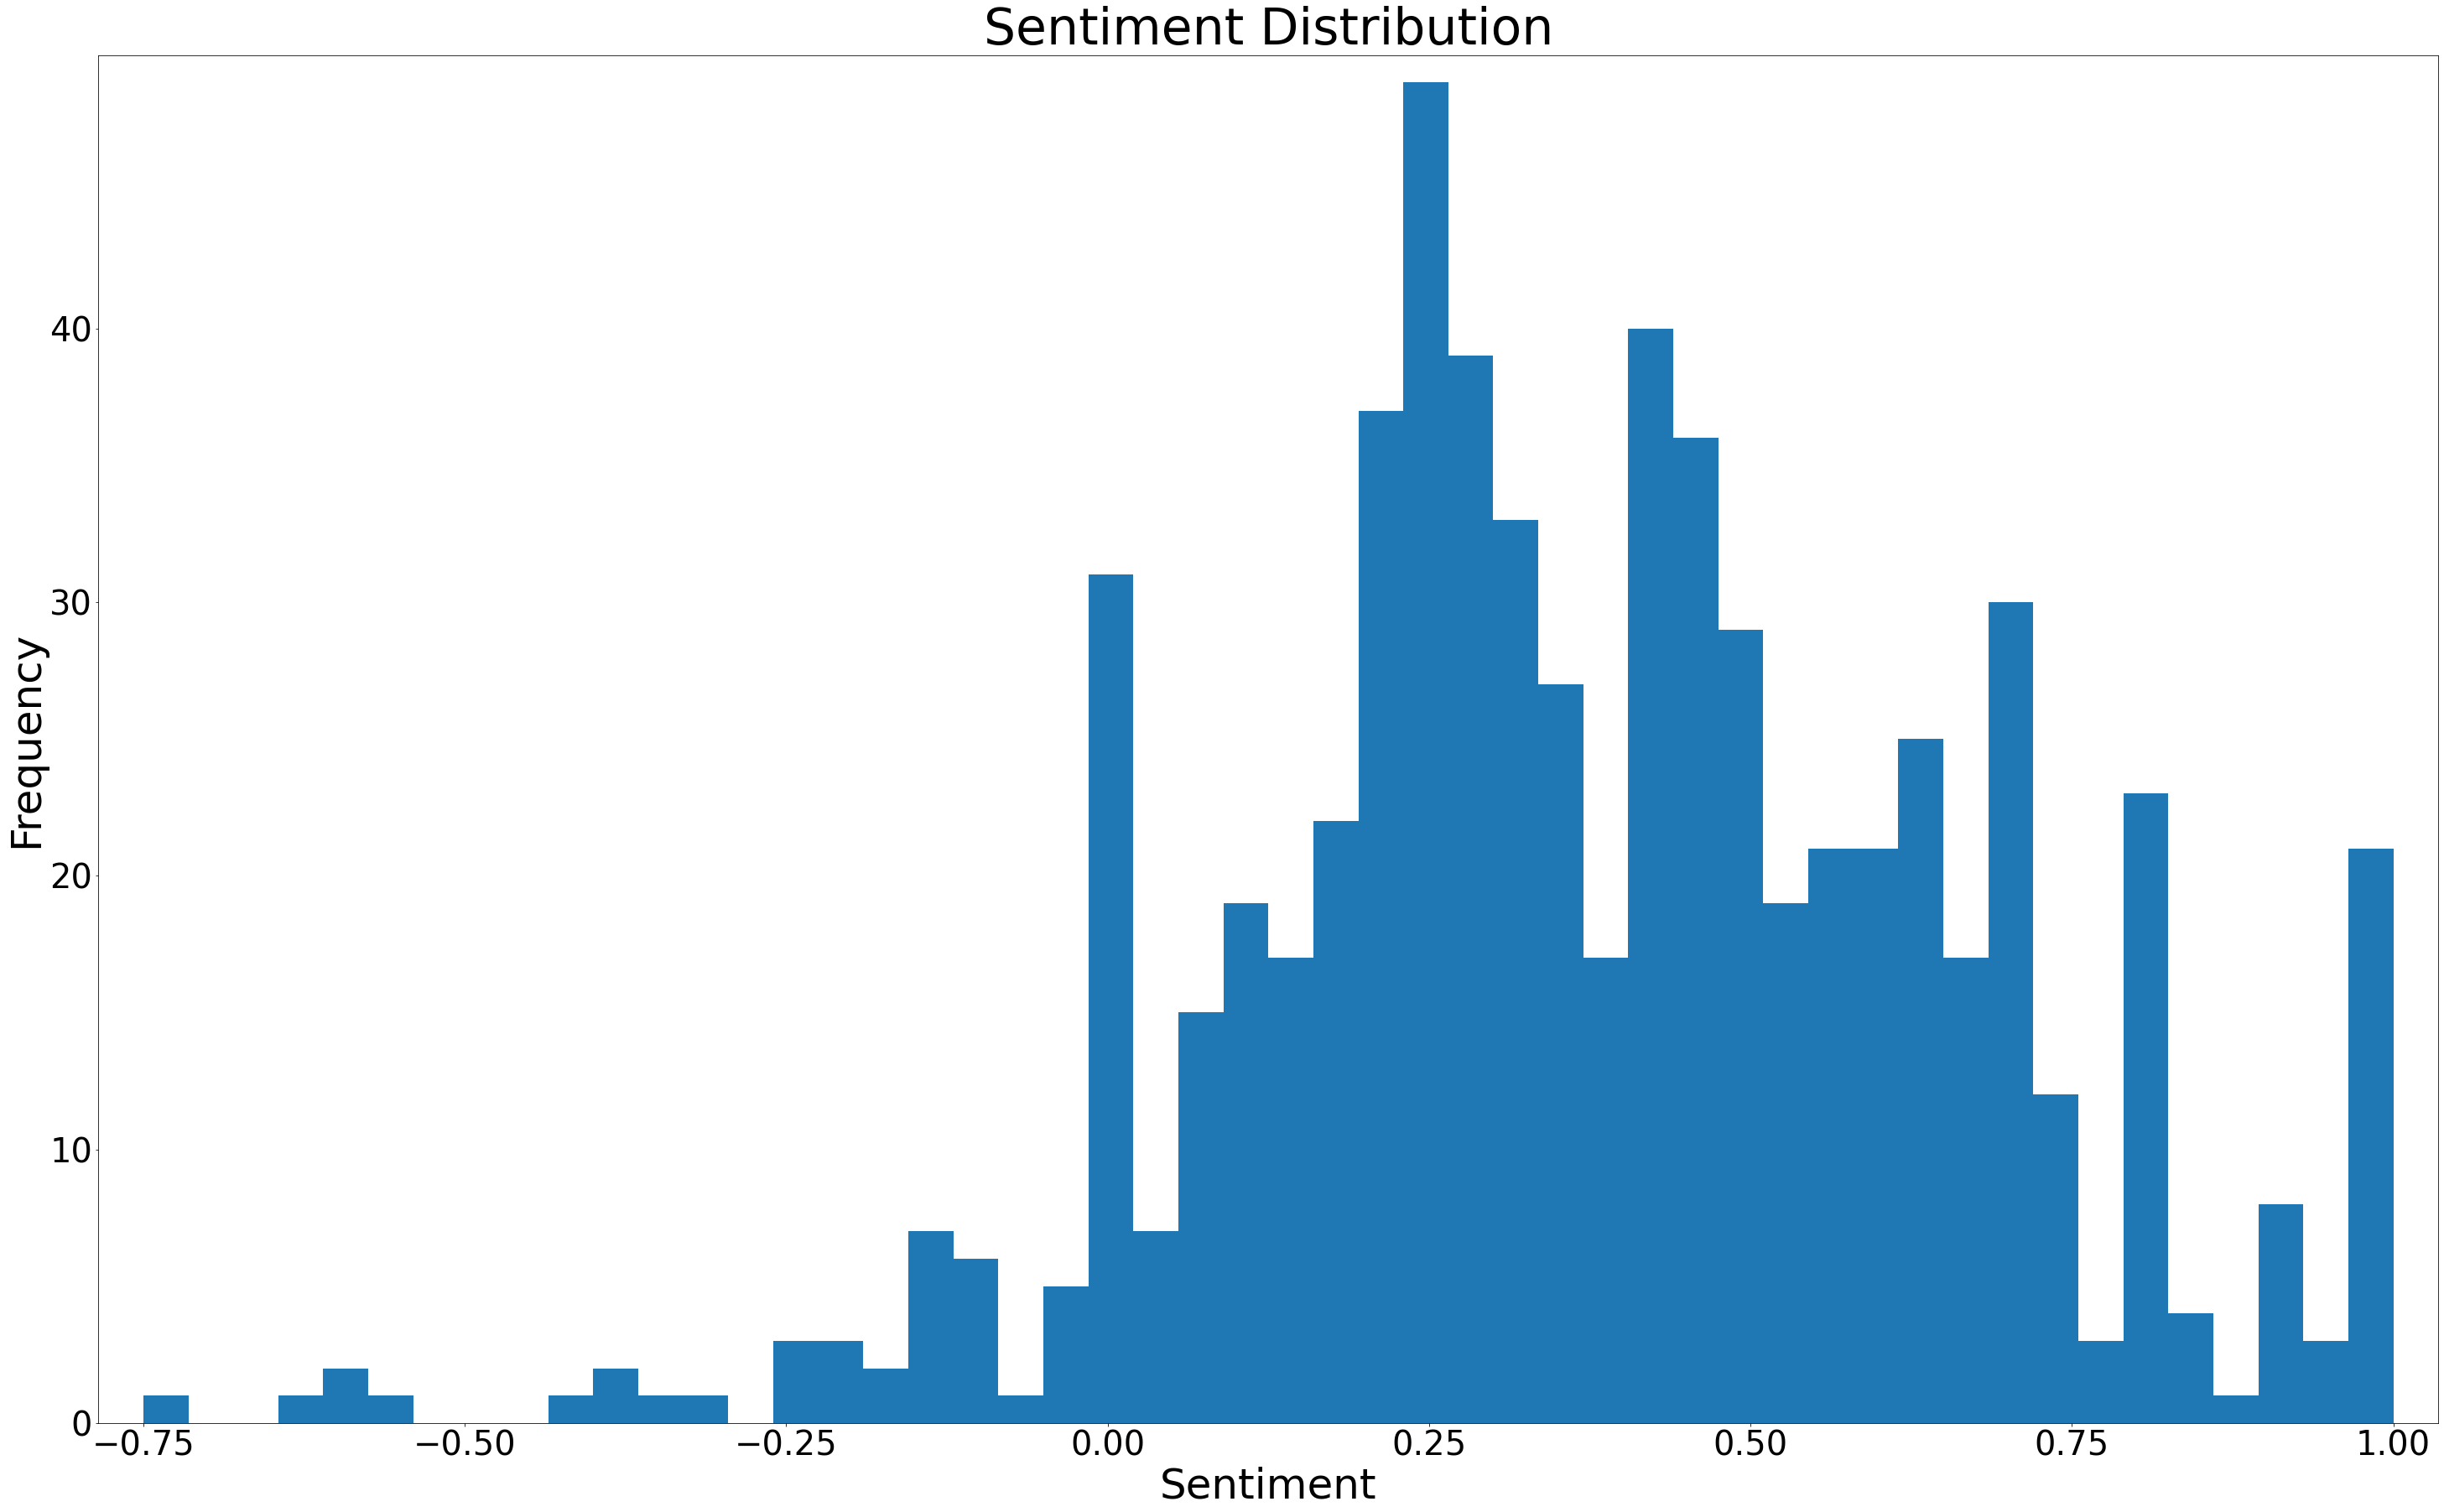

In [46]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

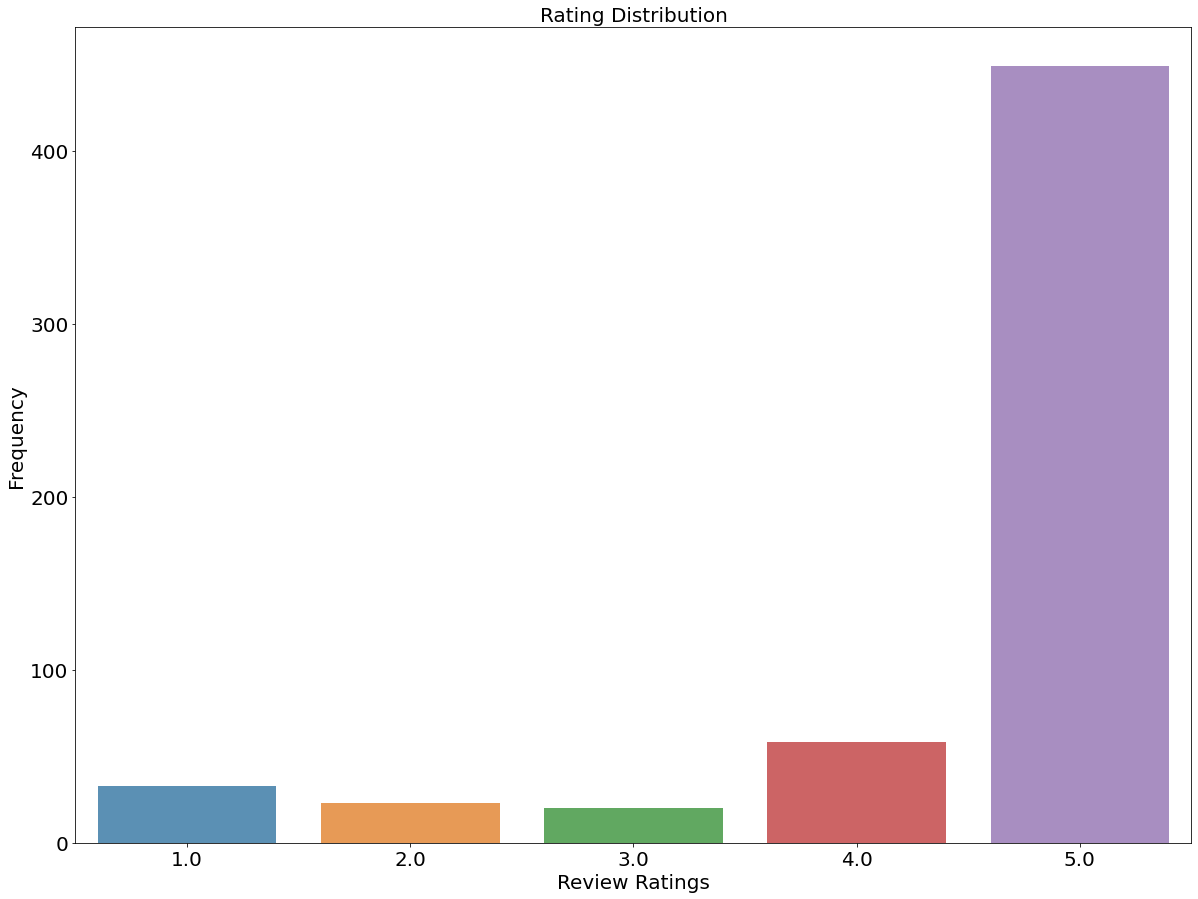

In [47]:
x_rating = df.reviews_rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(20,15))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Review Ratings', fontsize=20)
plt.xticks(fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='reviews_rating'>

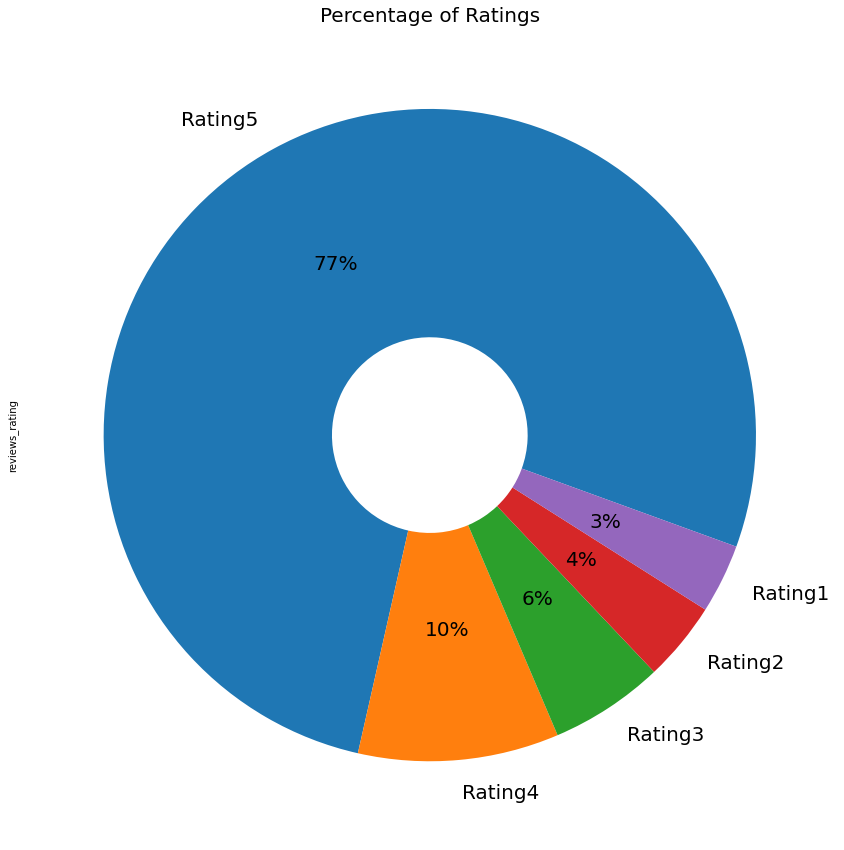

In [48]:
plt.figure(figsize=(20,15))
plt.title('Percentage of Ratings', fontsize=20)
df.reviews_rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 20})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


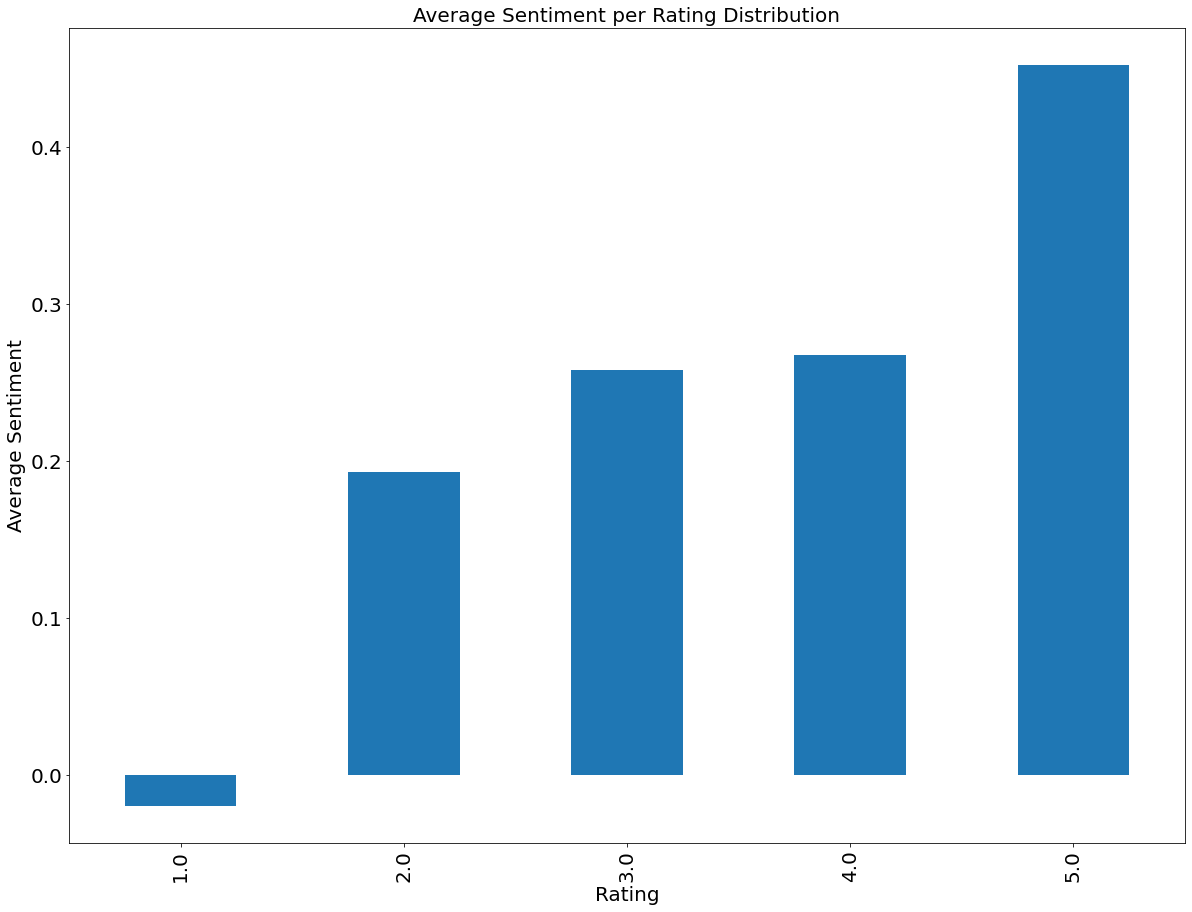

In [49]:
polarity_avg = df.groupby('reviews_rating')['sentiment'].mean().plot(kind='bar', figsize=(20,15))
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Average Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Sentiment per Rating Distribution', fontsize=20)
plt.show()

Create two additional features of “word_count” to determine the number of words per review and “review_len” to determine the number of letters per review.

In [50]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews_rating,lemmatized,lemma_str,sentiment,word_count,review_len
0,5.0,"[favorite, white, wine, fantastic, white, wine, occasion]",favorite white wine fantastic white wine occasion,0.225000,7,49
1,5.0,"[yum, tart, sweet, refresh, delicious]",yum tart sweet refresh delicious,0.675000,5,32
2,5.0,"[new, favorite, give, wine, delightful, surprise, find, flavorful, delicious, taste, new, favorite]",new favorite give wine delightful surprise find flavorful delicious taste new favorite,0.545455,12,86
3,5.0,"[bold, flavorful, aromatic, delicious, phenomenal, wine, new, favorite, red]",bold flavorful aromatic delicious phenomenal wine new favorite red,0.411616,9,66
4,5.0,"[yum, plus, environmentally, friendly, 4, 750ml, bottle, price, two, way, le, packaging, yes, pl...",yum plus environmentally friendly 4 750ml bottle price two way le packaging yes please nervous g...,0.279545,35,198
...,...,...,...,...,...,...
658,5.0,"[excellent, like, sweet, wine, skeptical, order, without, taste, first, glad, order, love, thank...",excellent like sweet wine skeptical order without taste first glad order love thanks kevin o'leary,0.328571,15,98
659,5.0,"[delicious, order, 3, bottle, set, meritage, moscata, wine, friend, huge, favor, definitely, kno...",delicious order 3 bottle set meritage moscata wine friend huge favor definitely know wine call s...,0.500000,37,216
660,5.0,"[sumptuous, delicious, wine., order, white, zinfadel, 3, bottle, selection, arrive, friday, wine...",sumptuous delicious wine. order white zinfadel 3 bottle selection arrive friday wine absolutely ...,0.543831,50,324
661,5.0,"[excellent, moscato, first, purchase, wine, try, moscato, like, sweet, wine, find, best, ever, d...",excellent moscato first purchase wine try moscato like sweet wine find best ever drawback order ...,0.650000,24,144


Although the differences are not significantly large it seems the longest reviews based on the count of letters and words seem to be negative and neutral. <br />It seems disgruntled reviewers typically provide significantly more detail in their reviews. <br />This result is not uncommon as humans have a tendency to complain in detail but praise in brief. <br /> This can be further confirmed by examining the correlation matrix below. <br /> Both ratings and sentiment have a negative correlation with “review_len” and “word_count”. <br /> This would explain the inverse relationship as the count of letters and words per review increases the overall rating and sentiment decreases. <br /> However, once again the correlation is rather small nevertheless negative.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


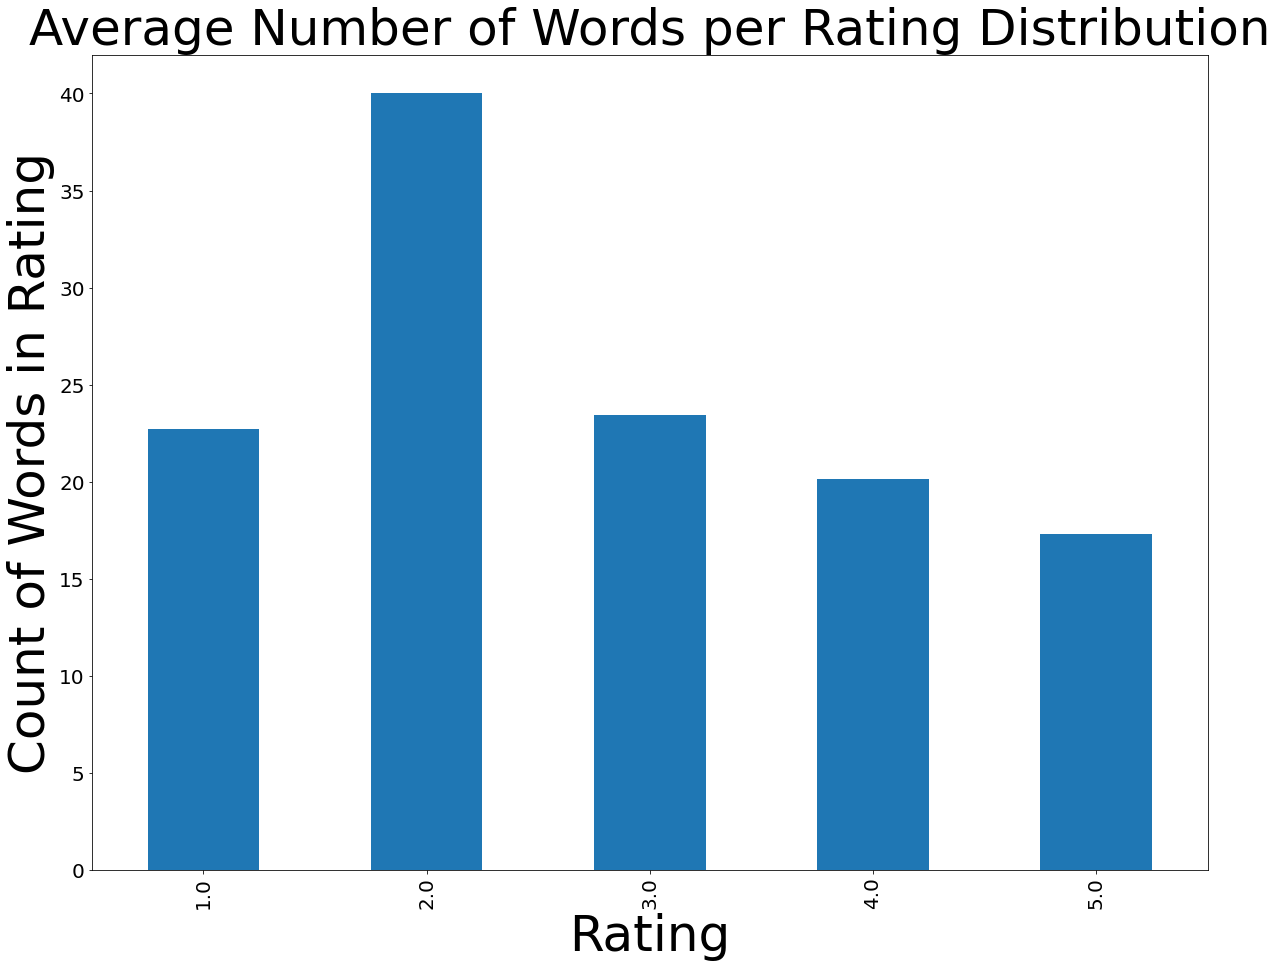

In [59]:
word_avg = df.groupby('reviews_rating')['word_count'].mean().plot(kind='bar', figsize=(20,15))
plt.xlabel('Rating', fontsize=50)
plt.ylabel('Count of Words in Rating', fontsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Number of Words per Rating Distribution', fontsize=50)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


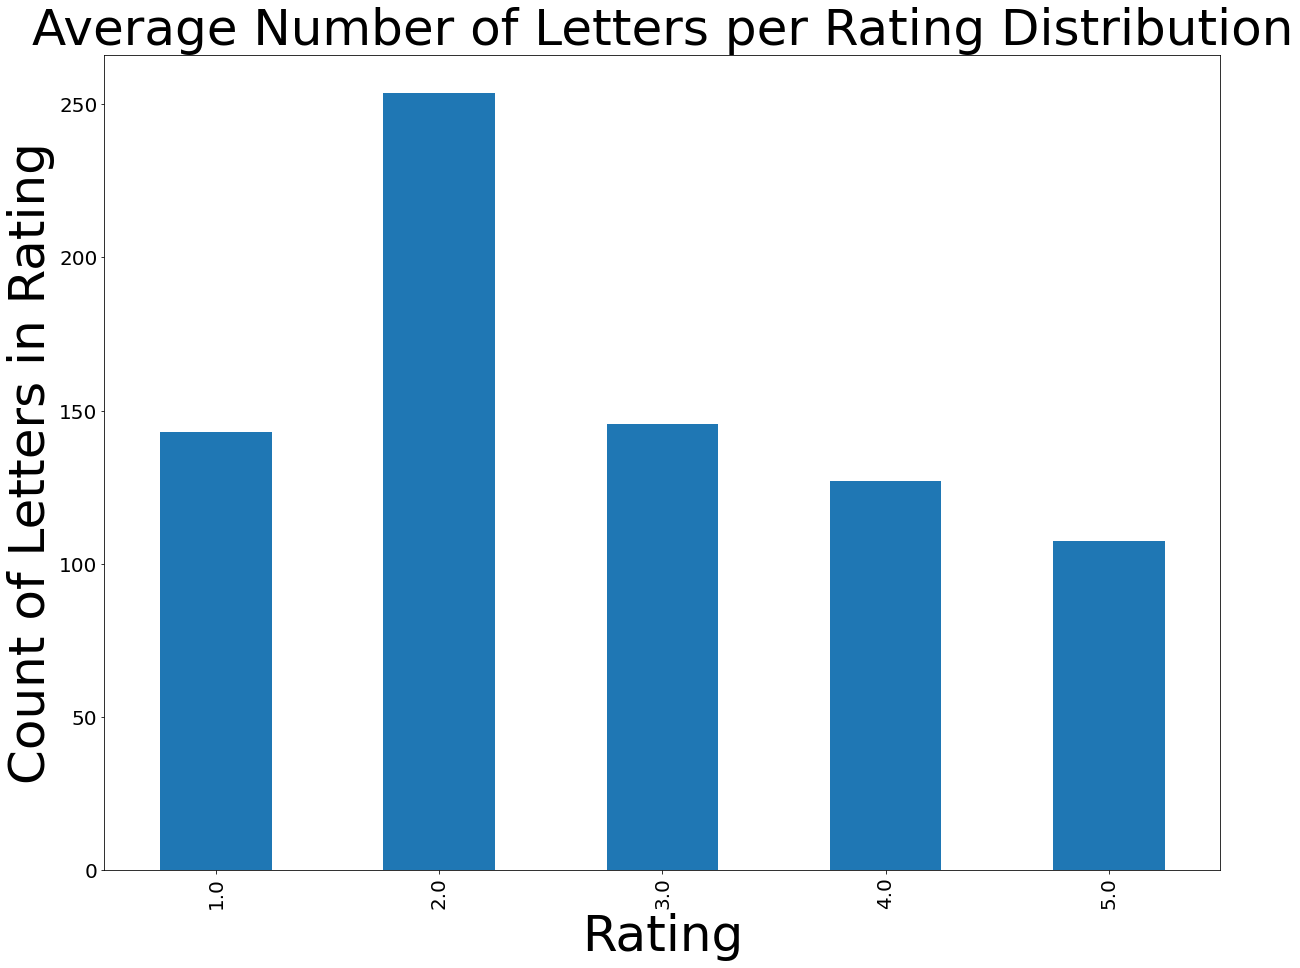

In [60]:
letter_avg = df.groupby('reviews_rating')['review_len'].mean().plot(kind='bar', figsize=(20,15))
plt.xlabel('Rating', fontsize=50)
plt.ylabel('Count of Letters in Rating', fontsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Number of Letters per Rating Distribution', fontsize=50)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

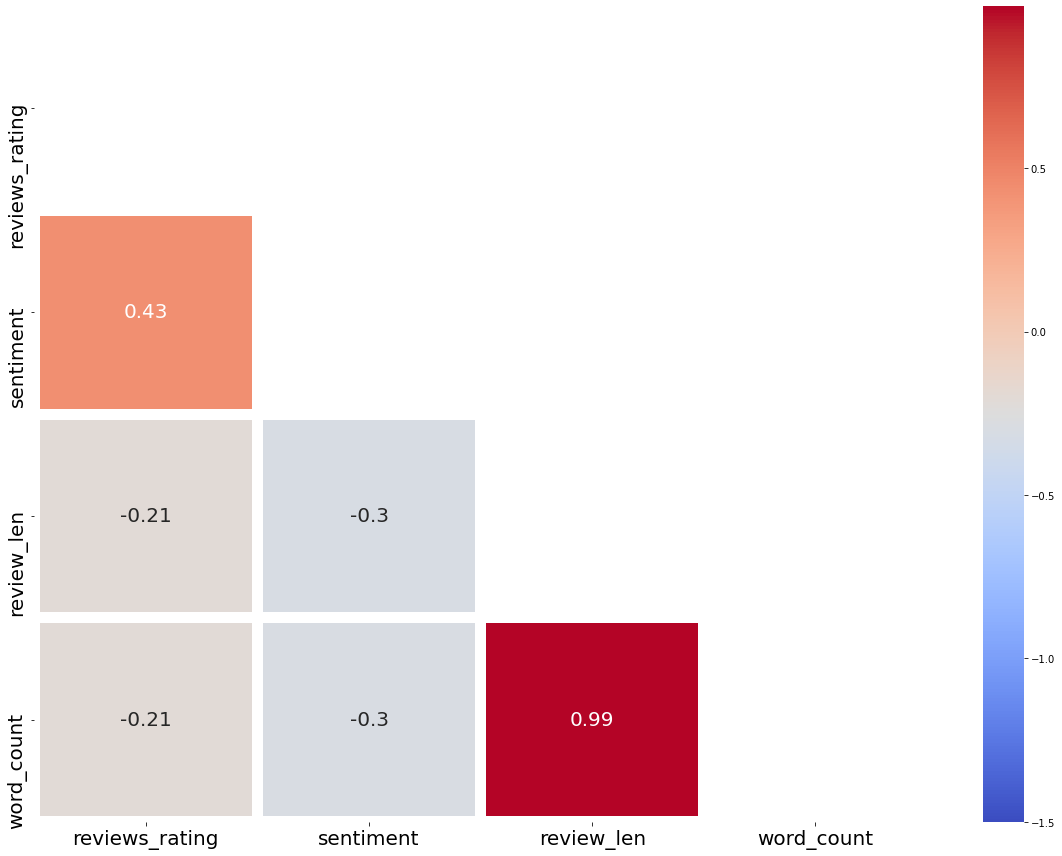

In [54]:
correlation = df[['reviews_rating','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.5, mask=mask)

#### Term Frequency Analysis
Let’s take an in-depth look at the actual reviews themselves. What are the most common words? What are the most common words by rating?

In [61]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['favorite', 'white', 'wine', 'fantastic', 'white', 'wine', 'occasion', 'yum', 'tart', 'sweet', 'refresh', 'delicious', 'new', 'favorite', 'give', 'wine', 'delightful', 'surprise', 'find', 'flavorful', 'delicious', 'taste', 'new', 'favorite', 'bold', 'flavorful', 'aromatic', 'delicious', 'phenomenal', 'wine', 'new', 'favorite', 'red', 'yum', 'plus', 'environmentally', 'friendly', '4', '750ml', 'bottle', 'price', 'two', 'way', 'le', 'packaging', 'yes', 'please', 'nervous', 'good', 'true', 'would', 'like', 'wine', 'fantastic', 'go', 'bit', 'way', 'get', 'live', 'near', 'state', 'line', 'sell', 'state', 'due', 'liquor', 'law', 'worth', 'great', 'taste', 'love', 'beck', 'na', 'taste', 'like', 'regular', 'ale', 'smell', 'like', 'one', 'taste', 'great', 'na', 'drink', 'friend', 'love', 'great', 'head', 'pour', 'simply', 'wonderful', 'wine', 'wonderful', 'strong', 'aroma', 'bit', 'bitter', 'bite', 'still', 'goodit', 'worth', 'end', 'sweet', 'red.', 'would', 'give', 'one', 'star', 'come', 'cle

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


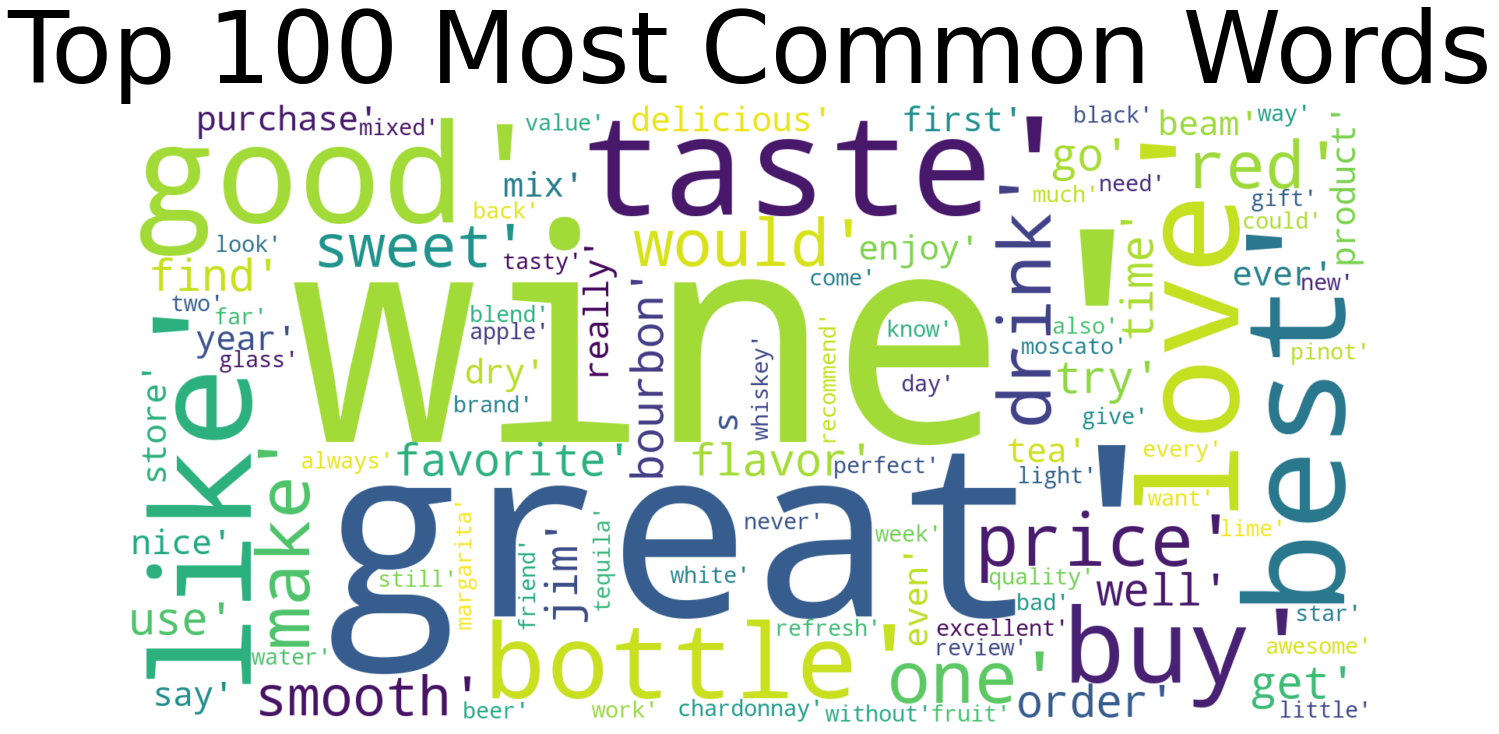

In [62]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


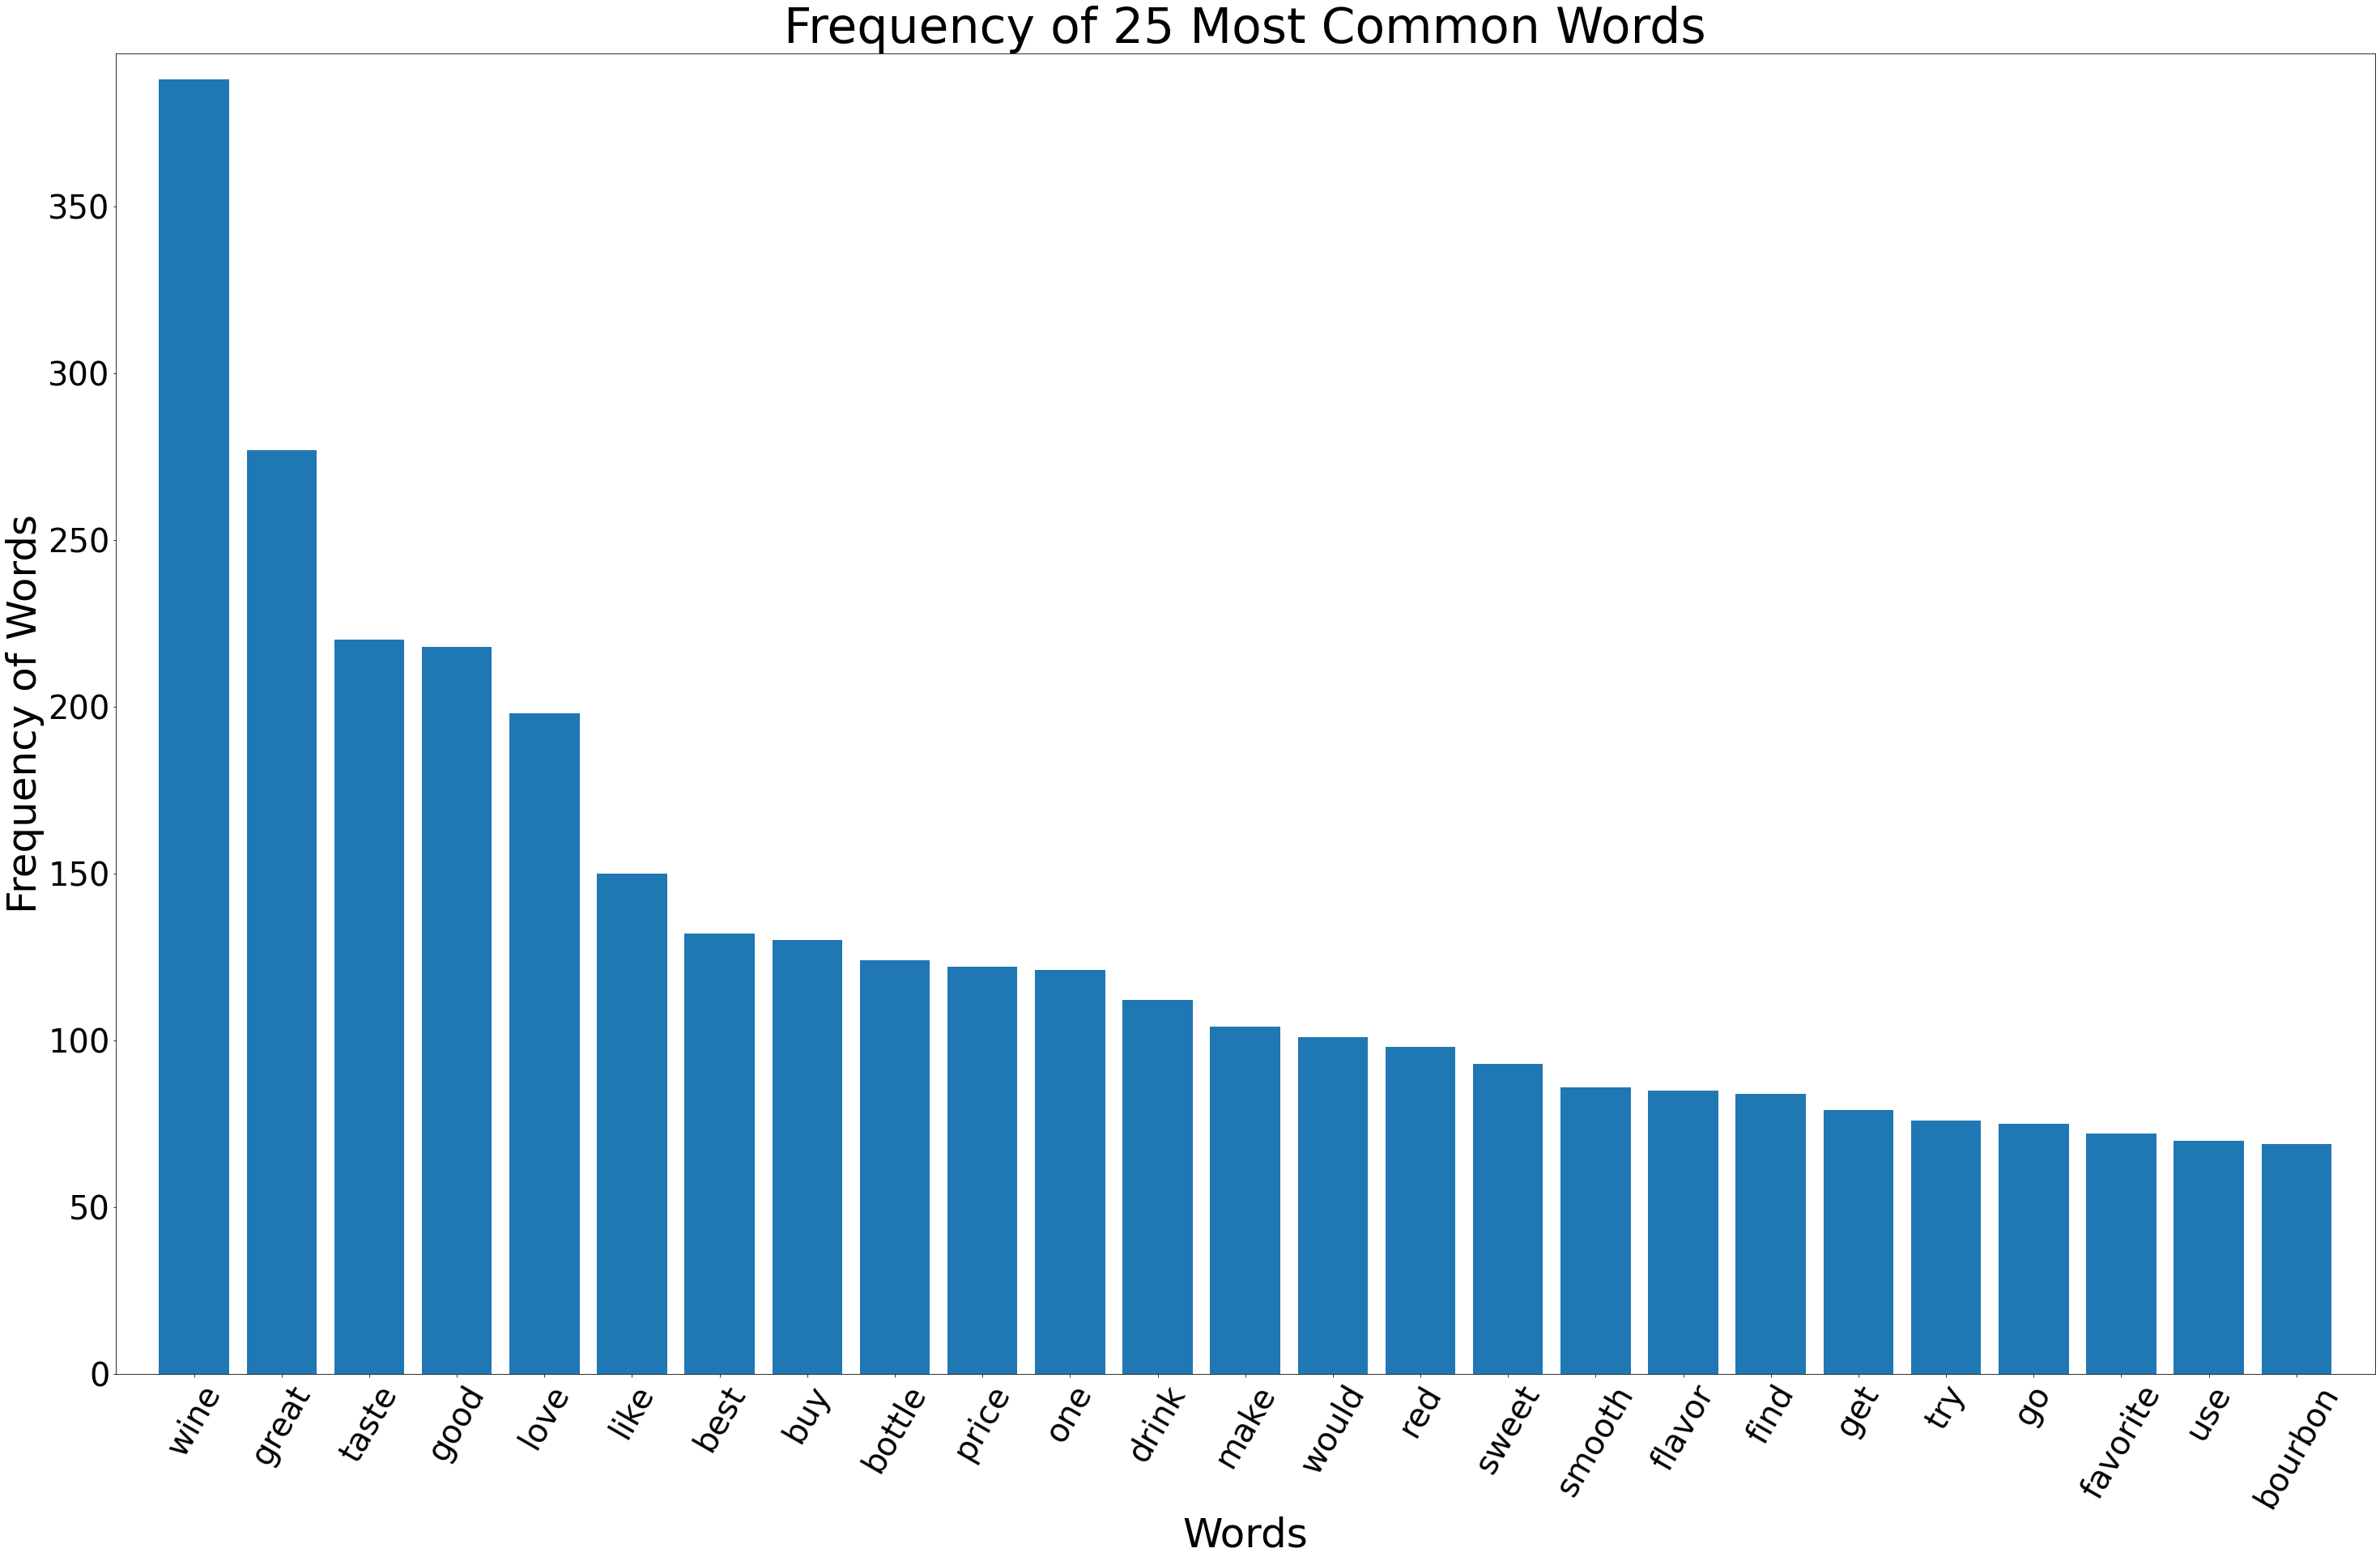

In [64]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [65]:
group_by = df.groupby('reviews_rating')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
group_by

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews_rating
1.0    [(wine, 32), (bottle, 17), (buy, 13), (taste, 11), (purchase, 10), (bad, 9), (money, 9), (would,...
2.0    [(wine, 39), (bottle, 18), (taste, 16), (like, 15), (pinot, 14), (good, 13), (chardonnay, 12), (...
3.0    [(wine, 13), (good, 9), (like, 9), (would, 9), (two, 7), (buy, 7), (get, 7), (taste, 7), (bottle...
4.0    [(wine, 57), (good, 31), (price, 22), (great, 21), (taste, 19), (like, 16), (one, 15), (would, 1...
5.0    [(wine, 222), (great, 192), (love, 167), (taste, 127), (good, 124), (best, 108), (drink, 85), (p...
Name: lemma_str, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


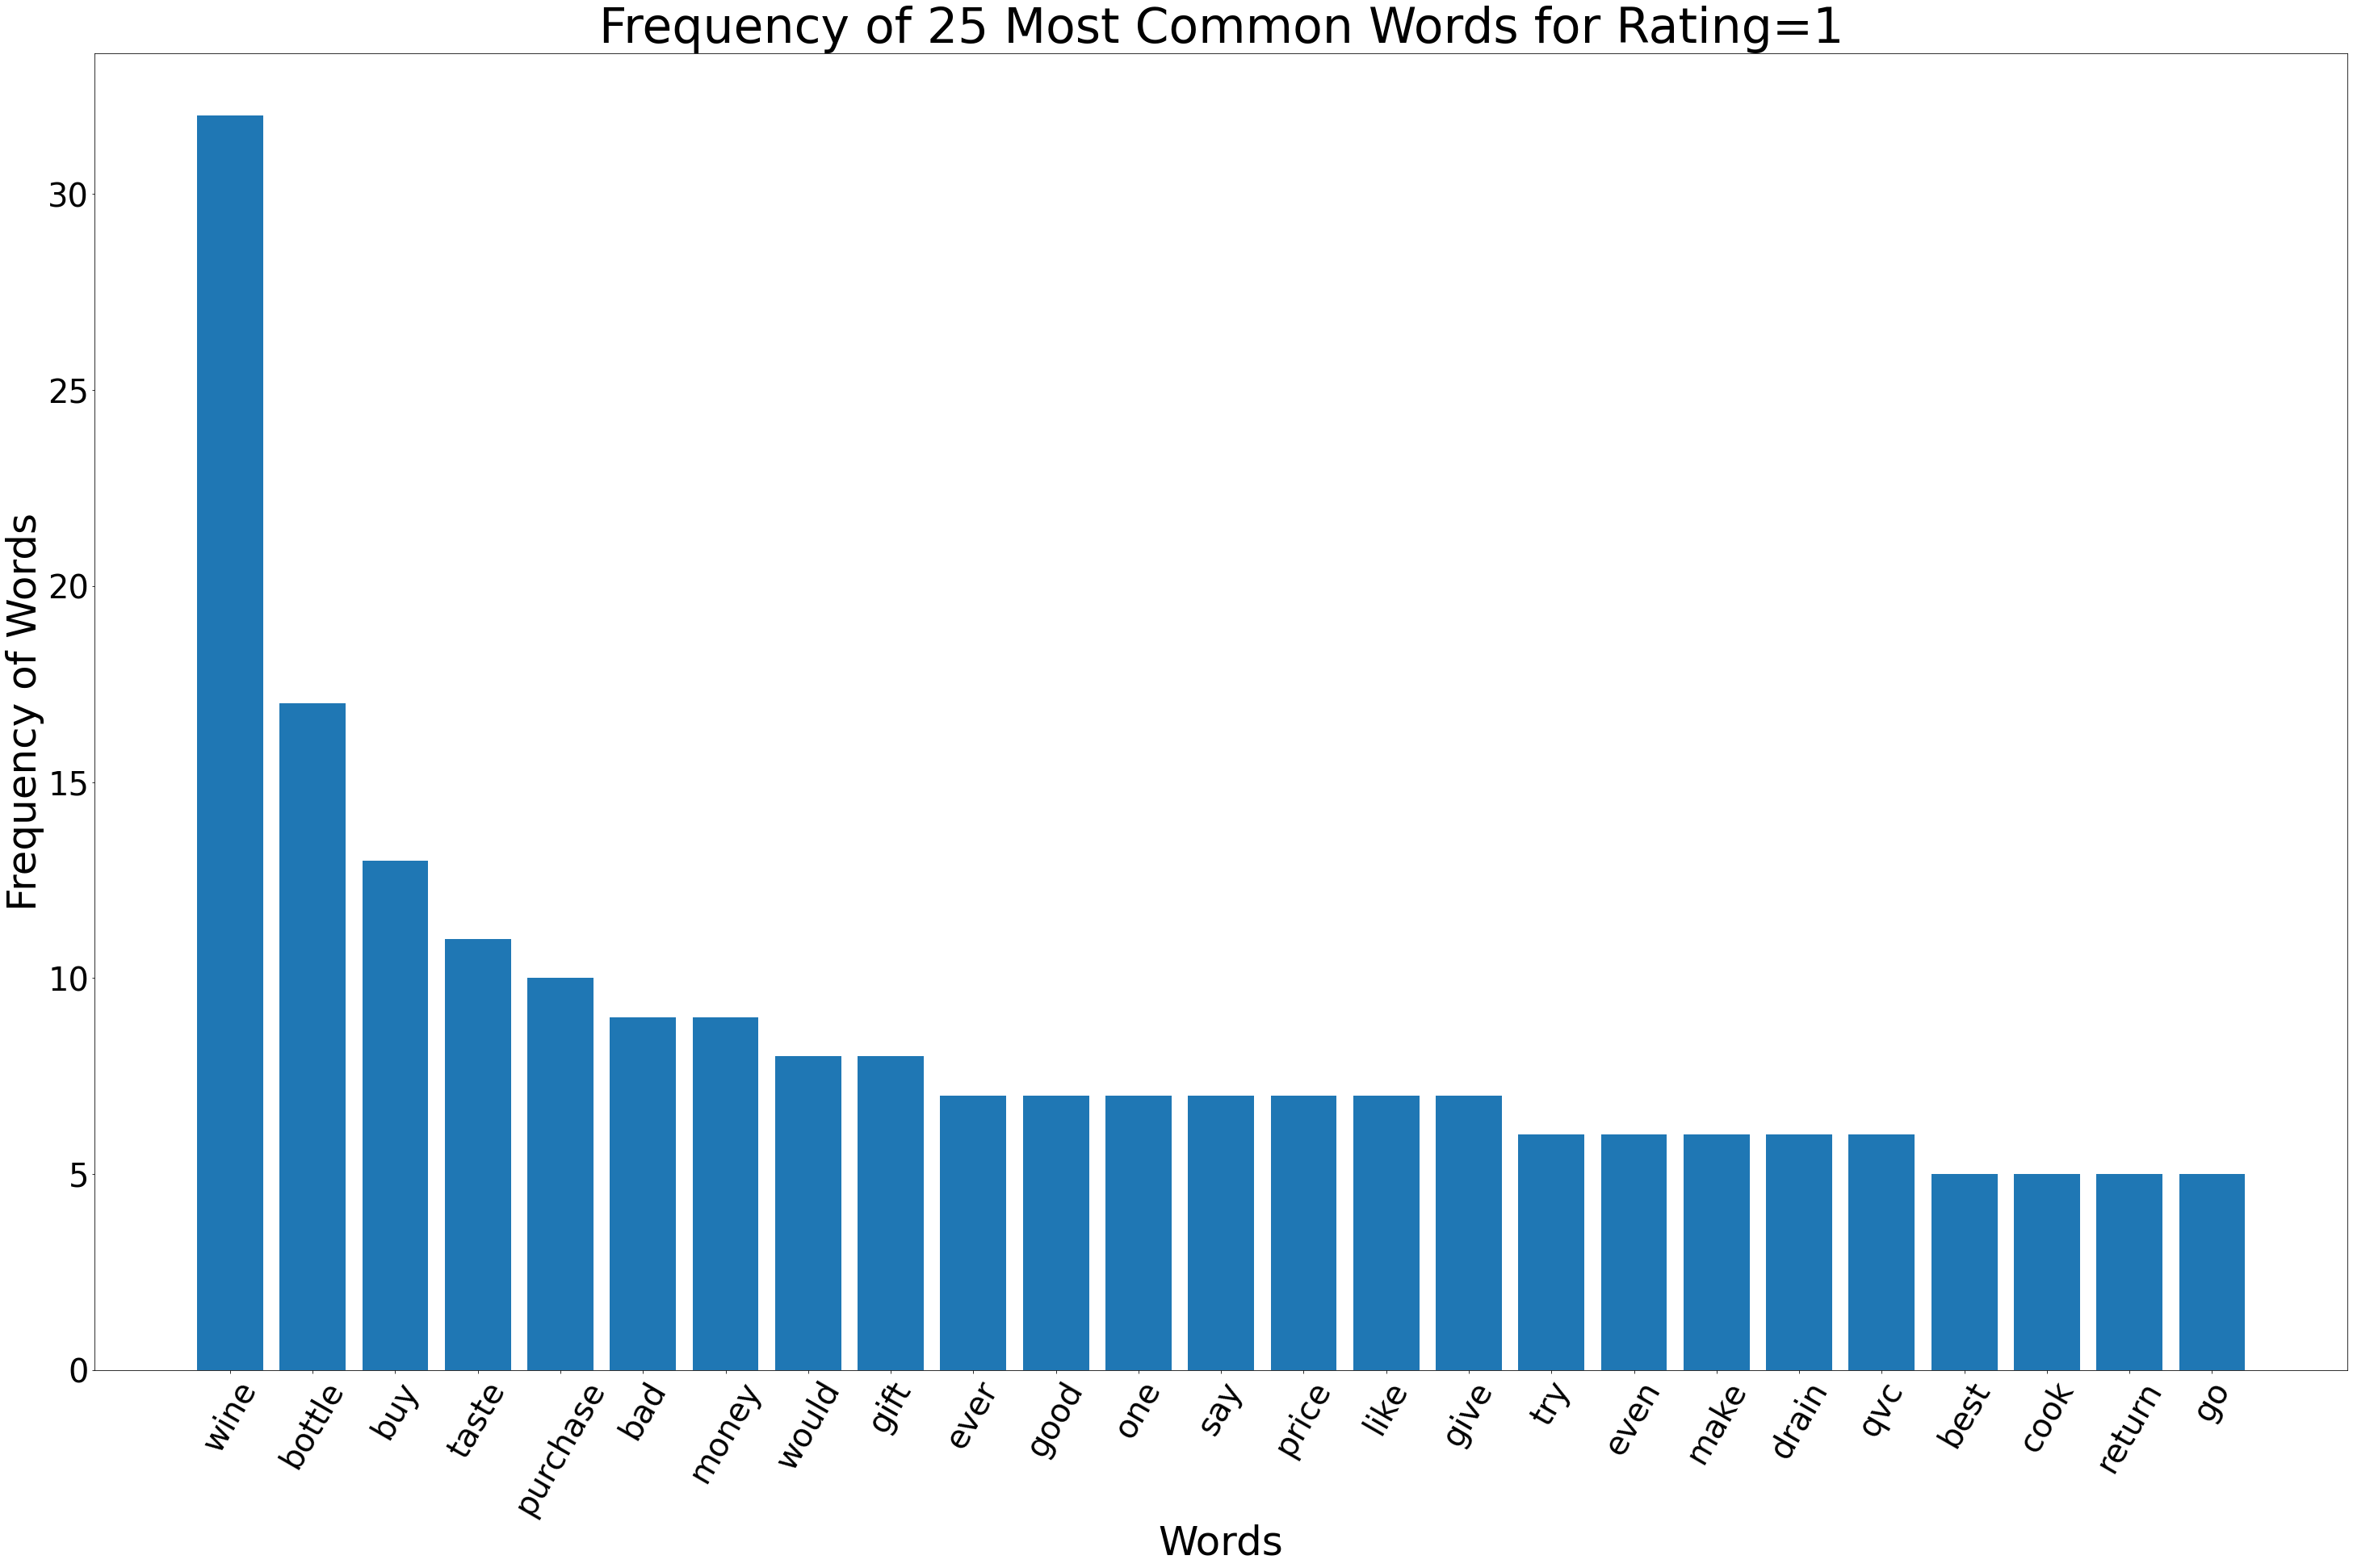

In [67]:
group_by = df.groupby('reviews_rating')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


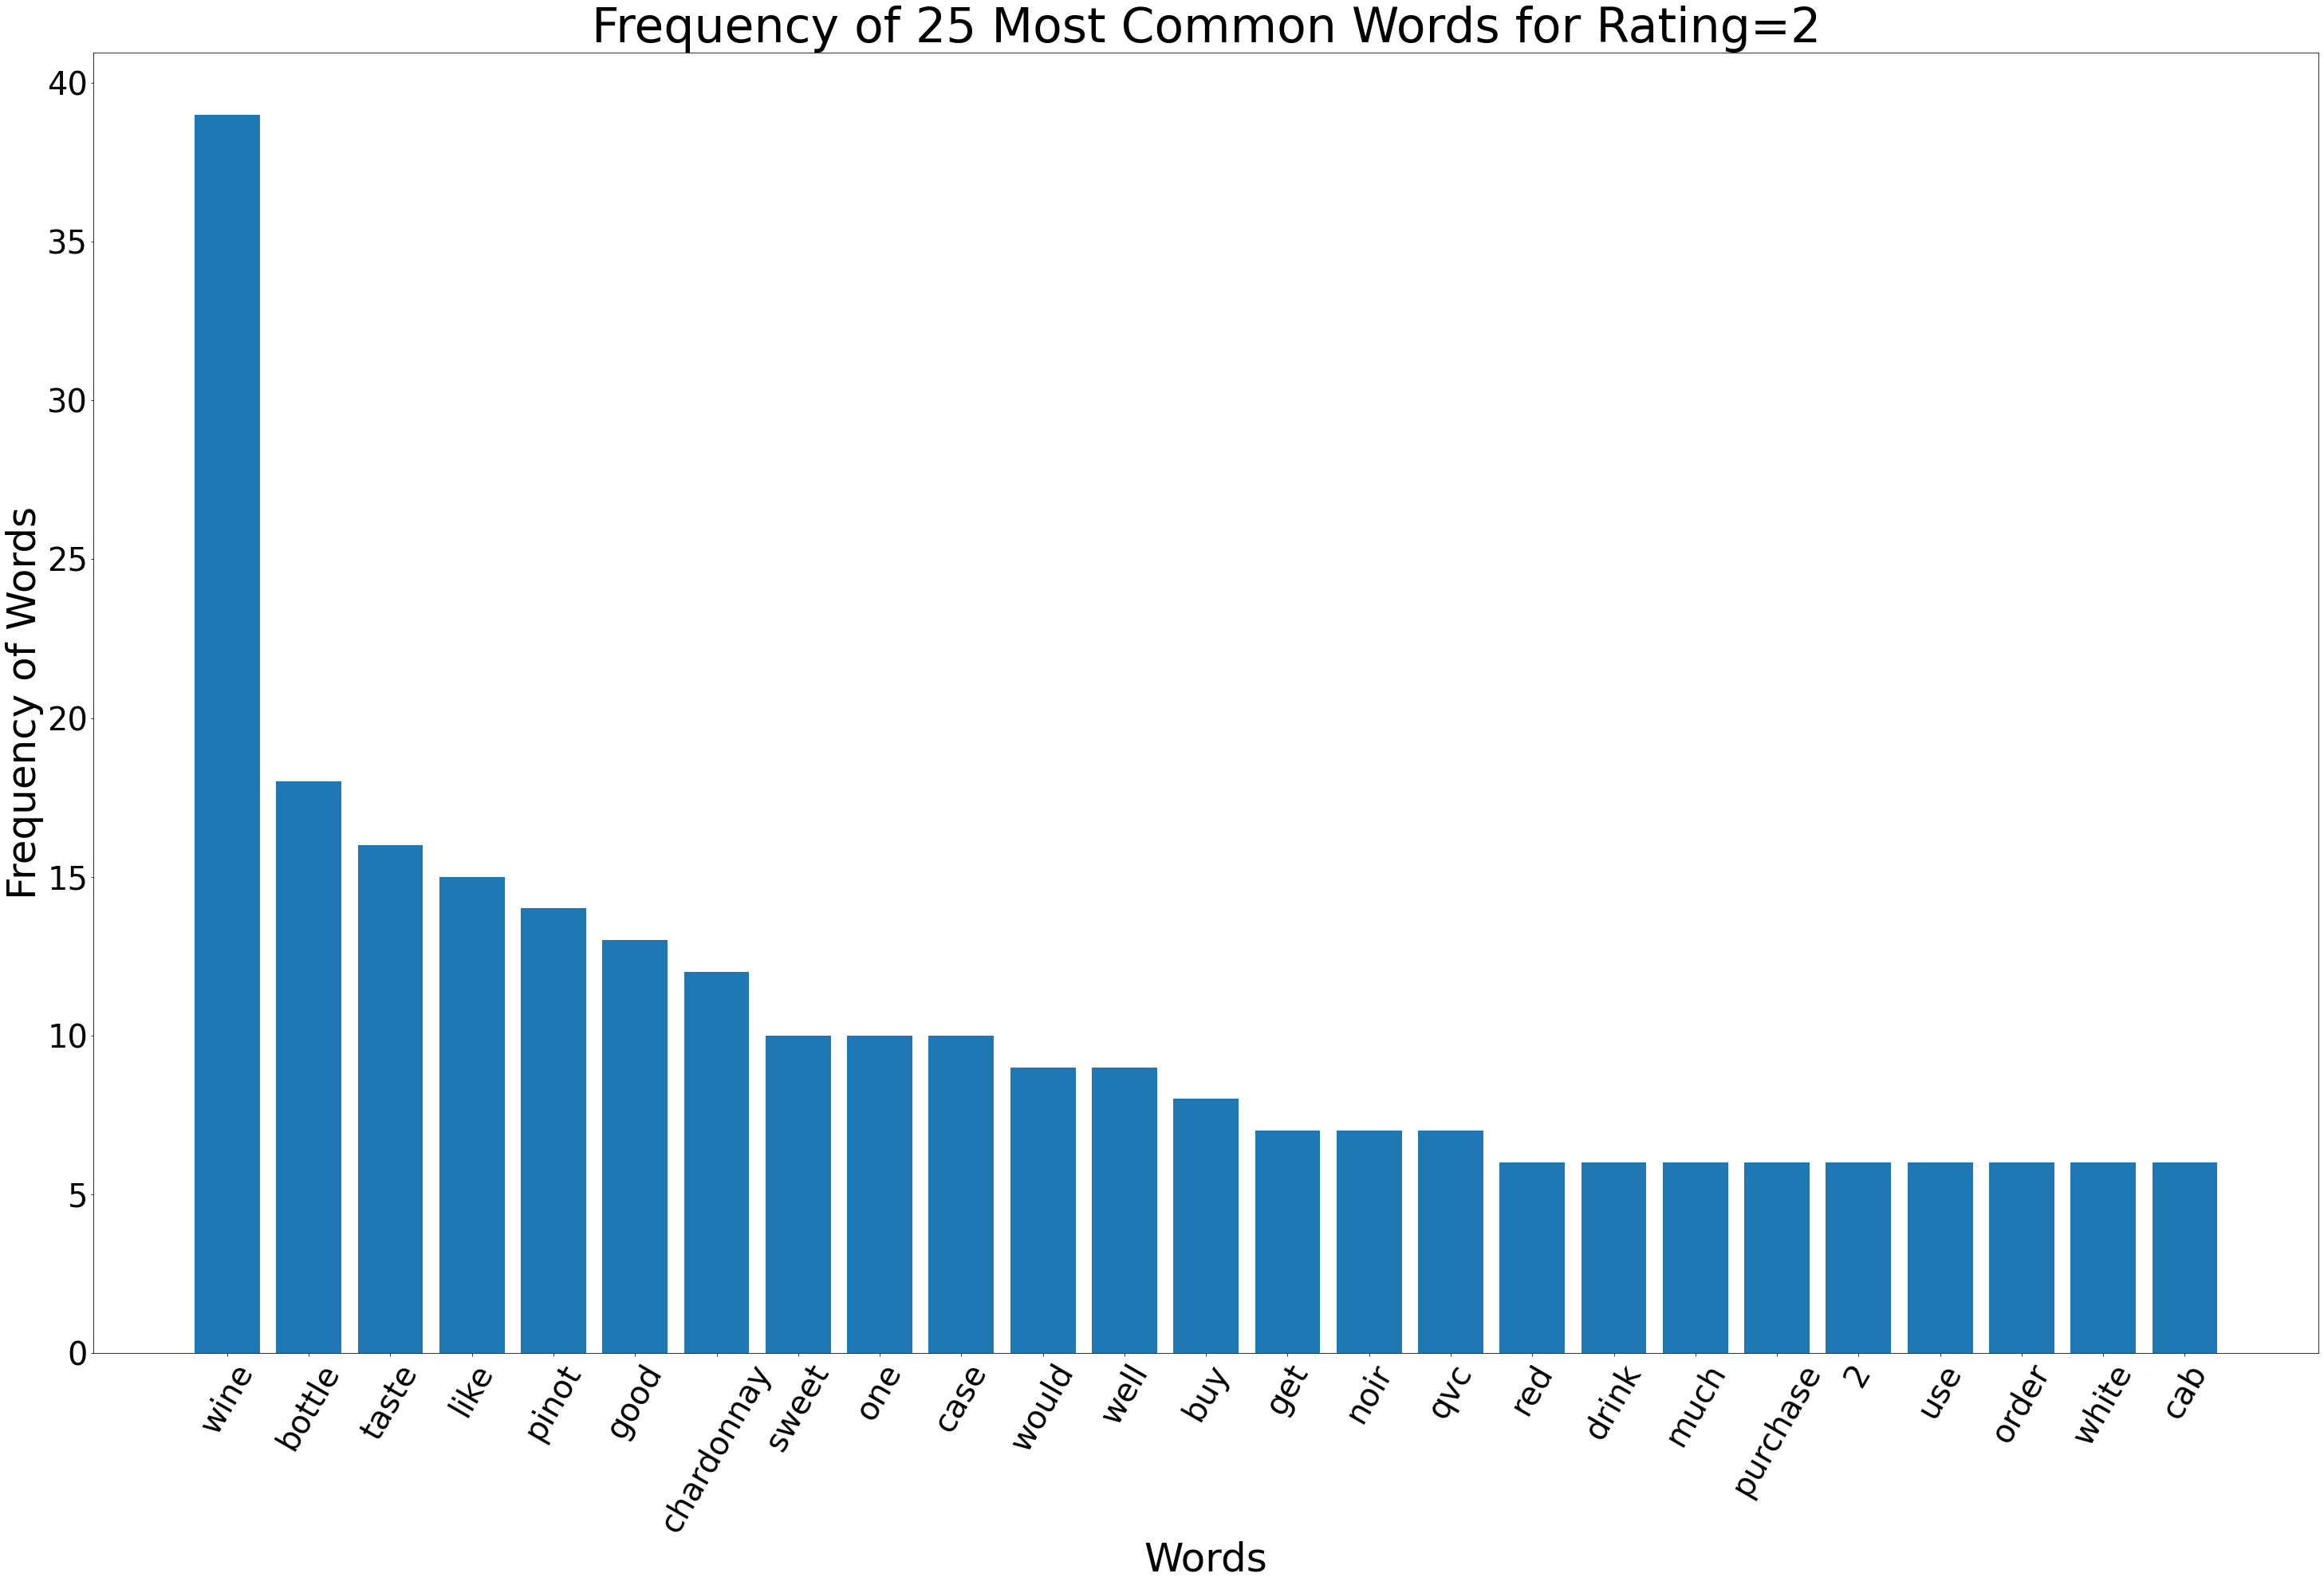

In [68]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


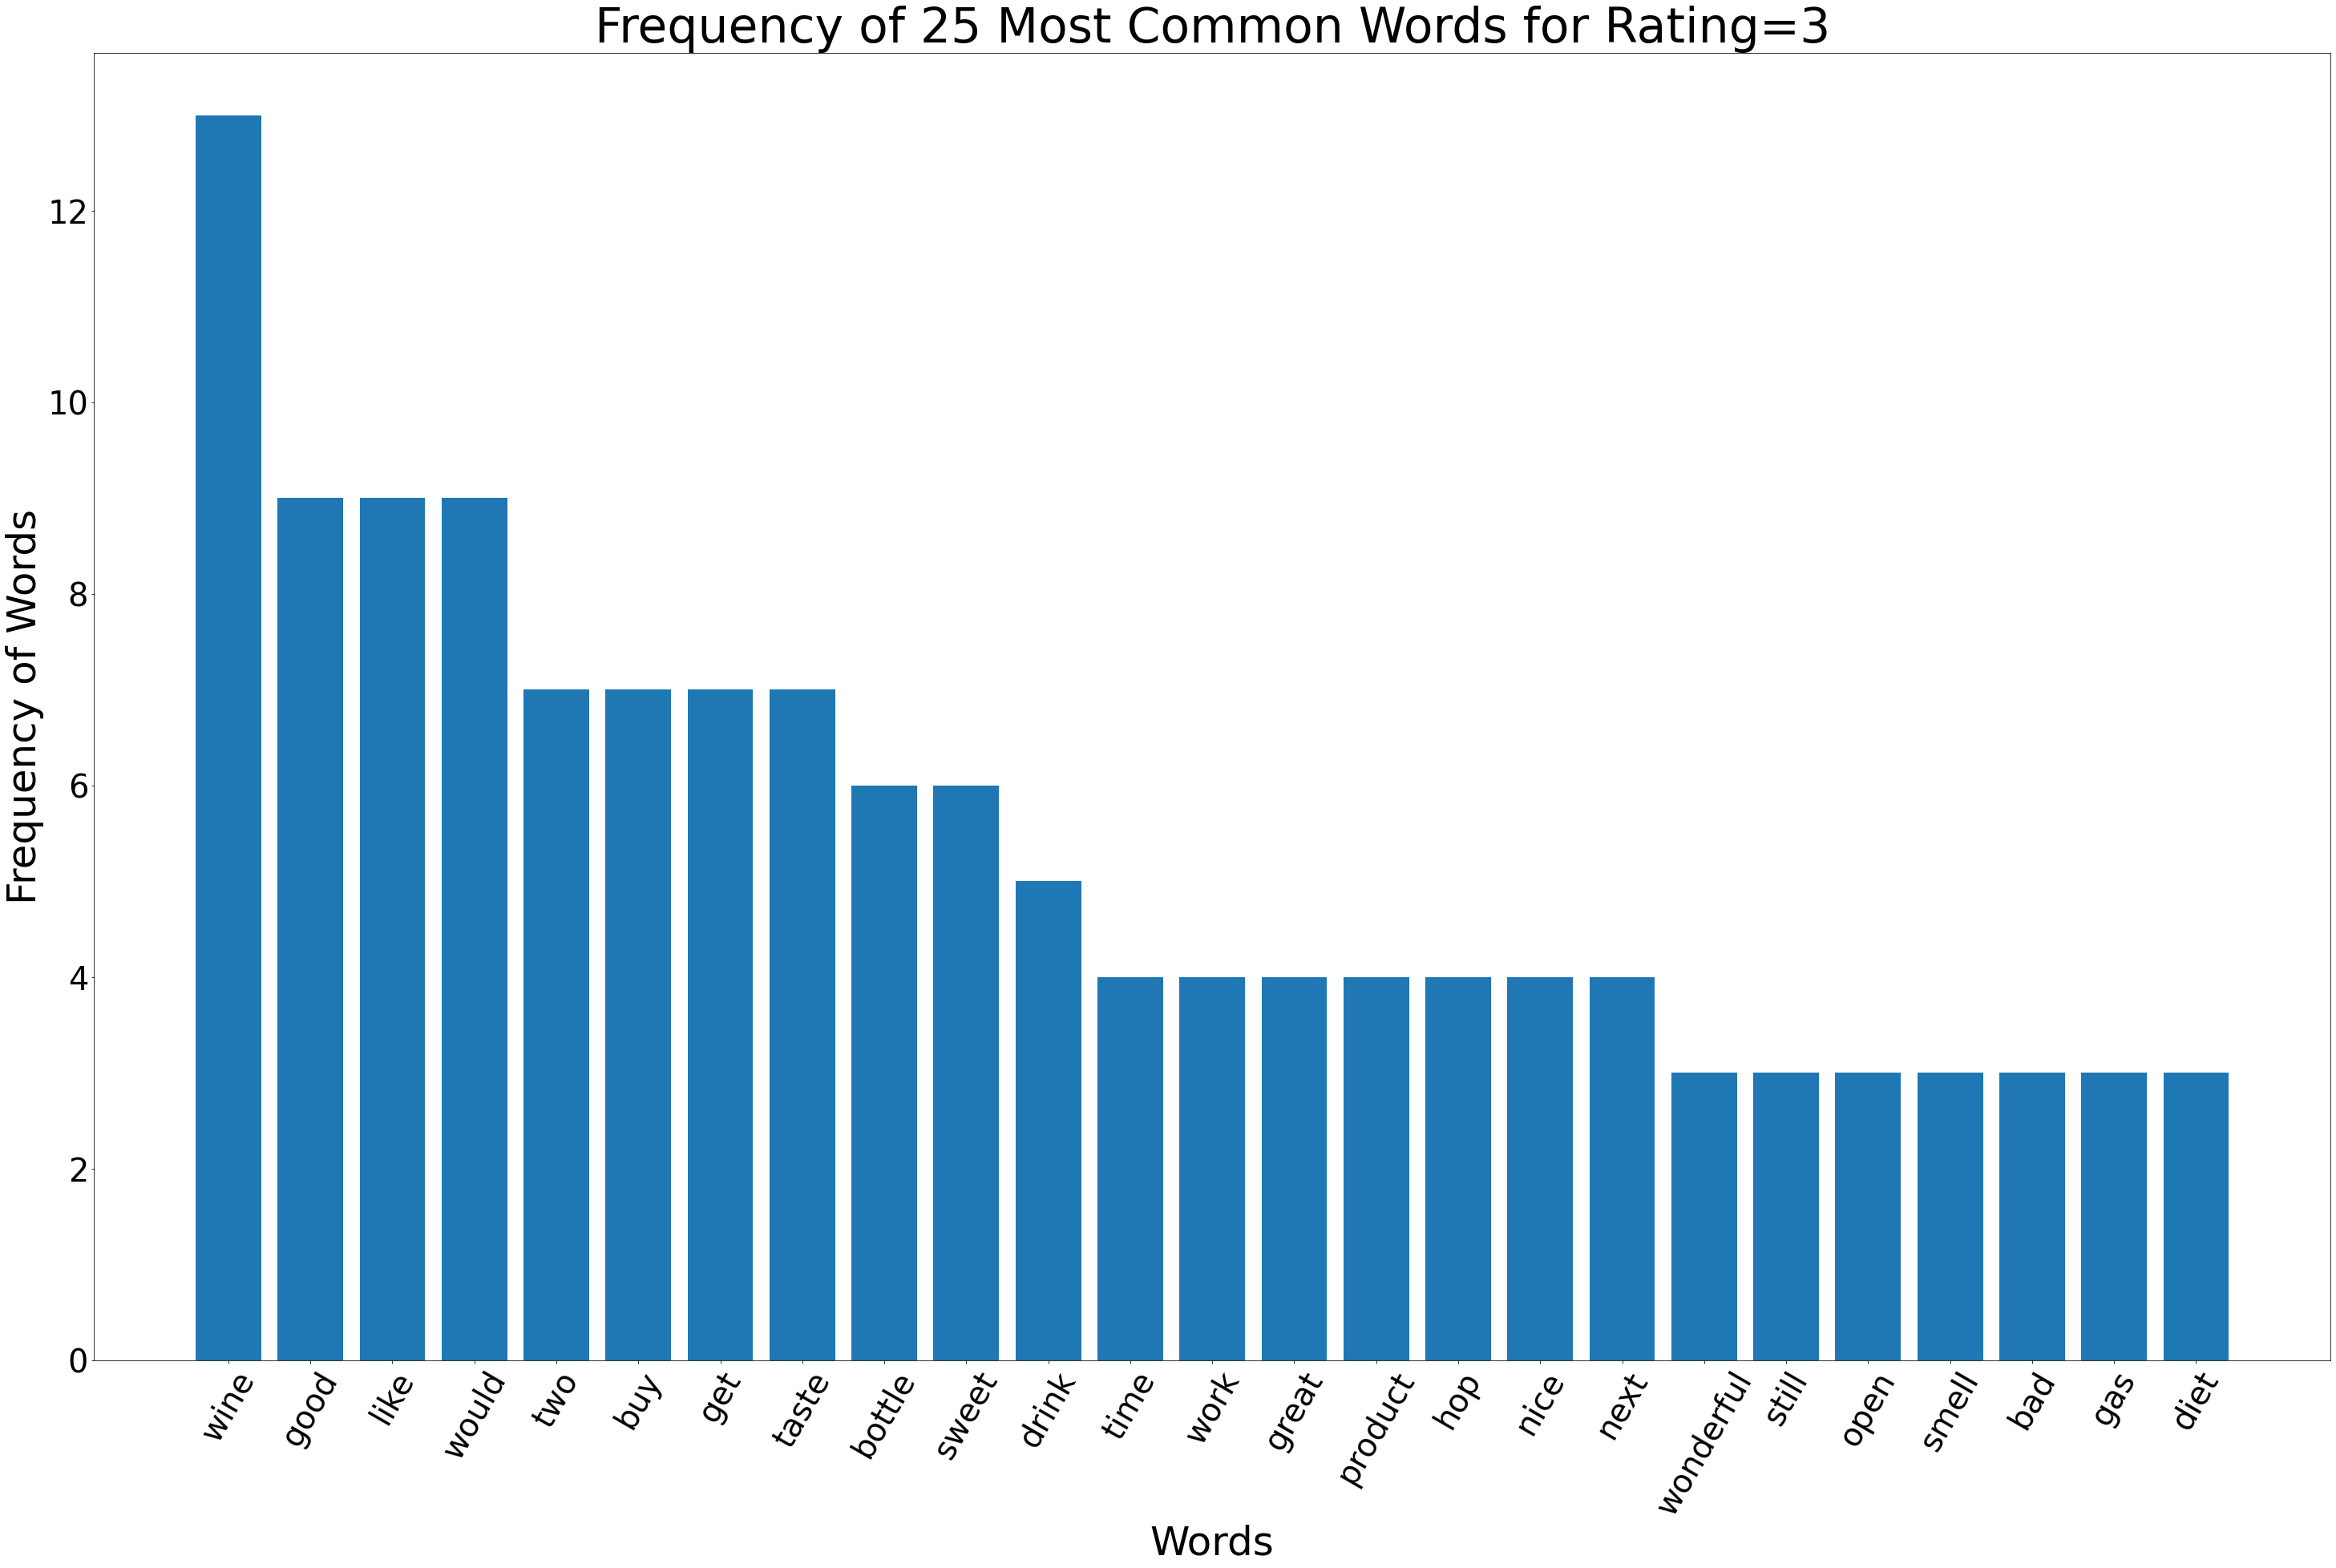

In [69]:
group_by_2 = group_by.iloc[2]
words1 = list(zip(*group_by_2))[0]
freq1 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


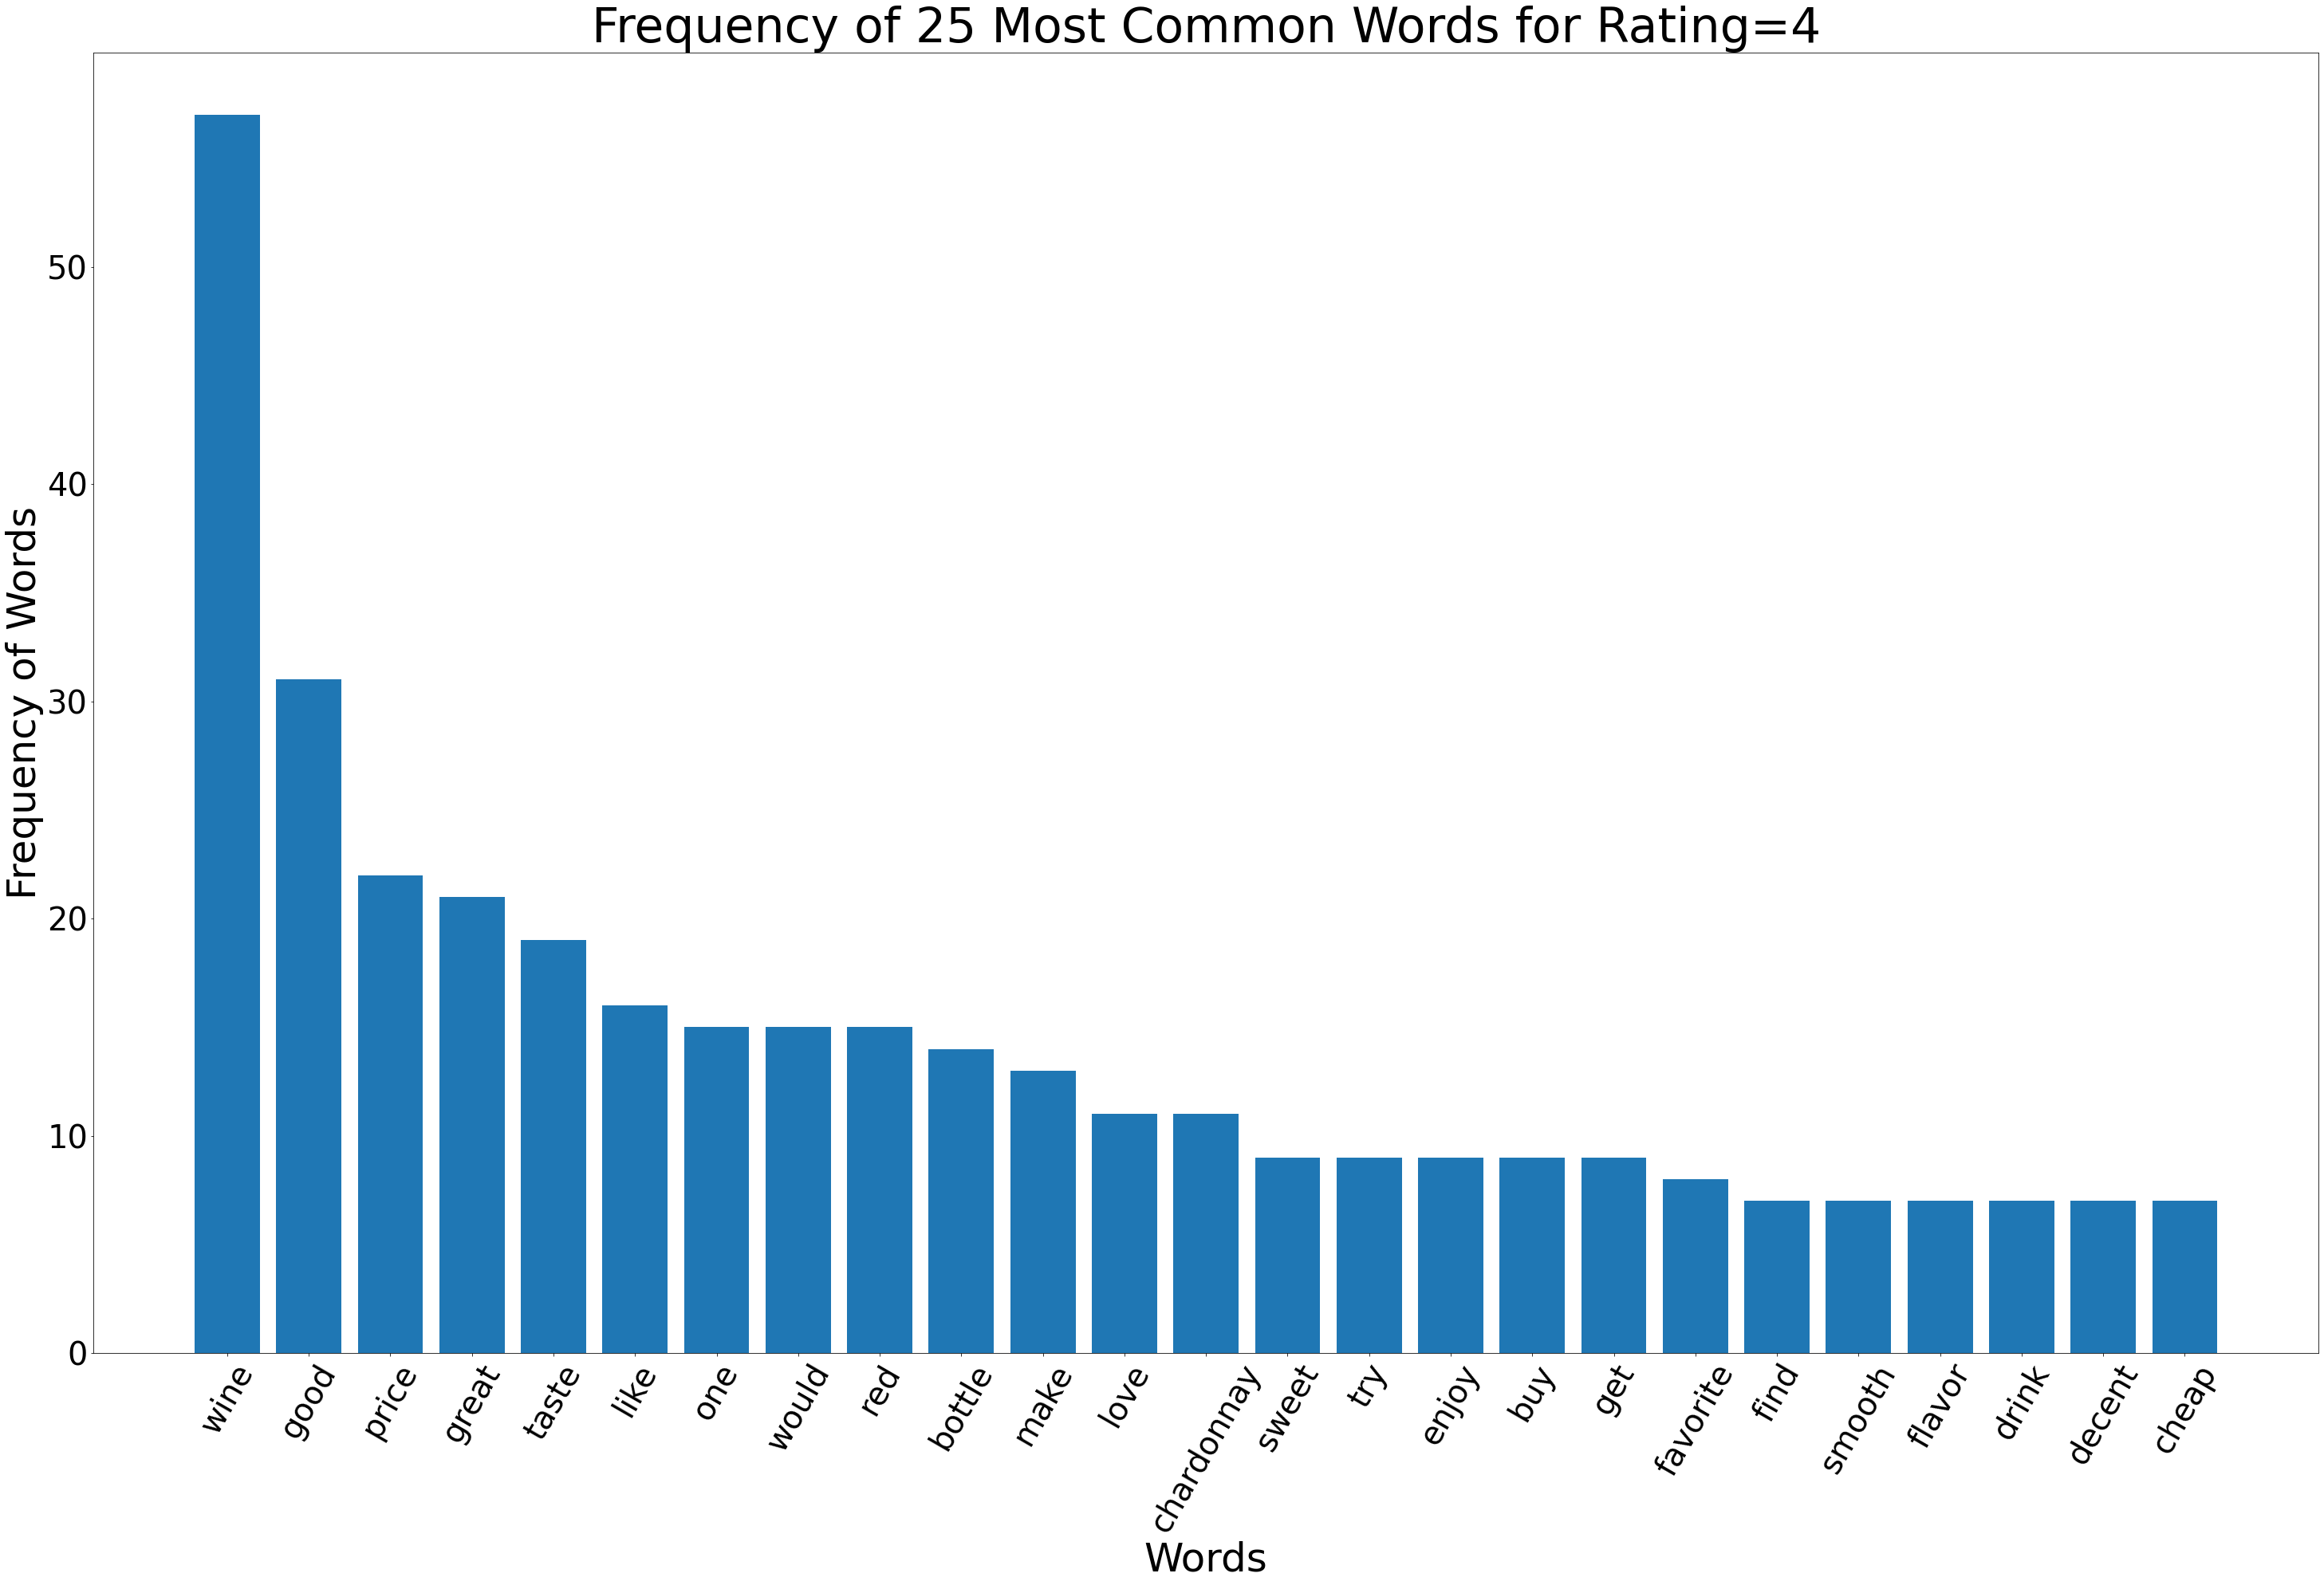

In [70]:
group_by_3 = group_by.iloc[3]
words1 = list(zip(*group_by_3))[0]
freq1 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


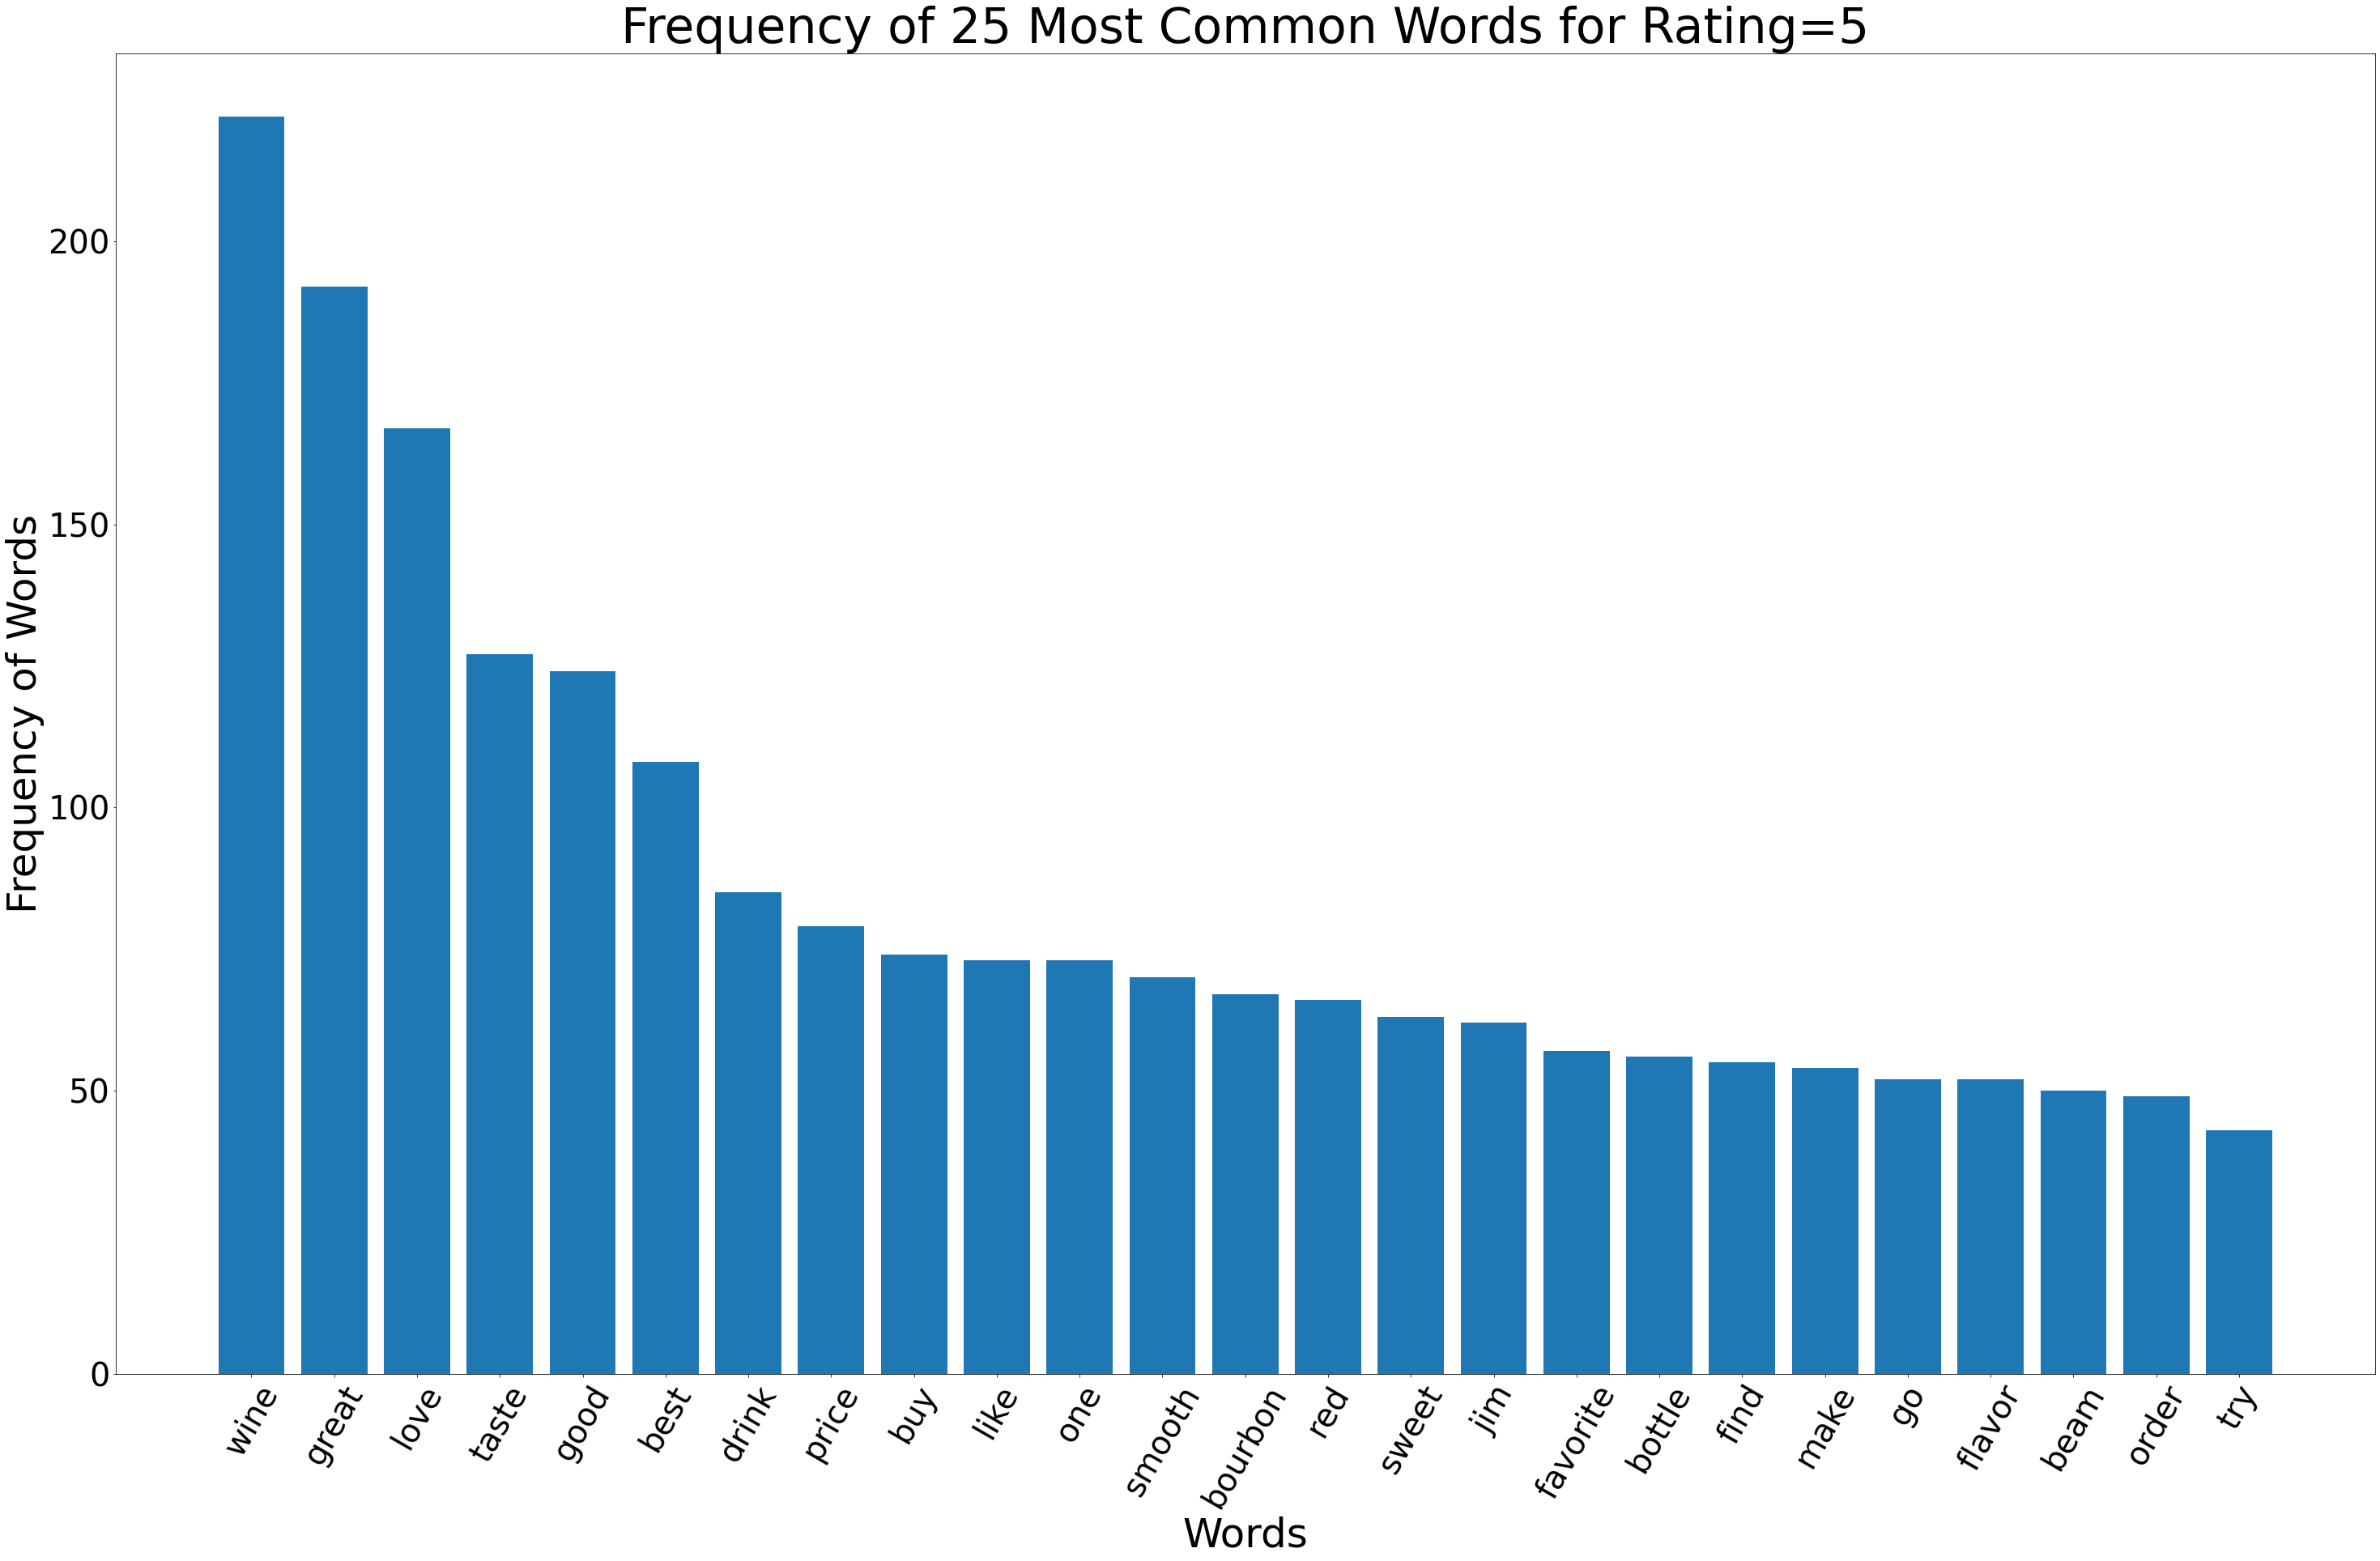

In [71]:
group_by_4 = group_by.iloc[4]
words1 = list(zip(*group_by_4))[0]
freq1 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()

Rating of 4 and 5 had very similar terms as it seems reviewers enjoy wines taste and price, <br /> This is very insightful as it helps to validate the results from ratings 1, 2, and 3. <br />Last but not least, these word frequencies (ie. ratings 4 & 5) have been derived from a very large number of reviews which only adds to the validity of these results; management is certainly an area of improvement.

#### Topic Modeling
Finally, let’s apply a few topic modeling algorithms to help derive specific topics or themes for our reviews. Before we have determined the topics for each rating we have to perform one additional processing step. Right now our data/words are still readable to us human beings whereas computers only understand numbers. We need to convert our text into numbers or vectors.

#### CountVectorizer
The CountVectorizer method of vectorizing tokens transposes all the words/tokens into features and then provides a count of occurrence of each word. The result is called a document term matrix, which you can see below.

First, we create the vectorizer object. Max_df=0.9 will remove words that appear in more than 90% of the reviews. Min_df=25 will remove words that appear in less than 25 reviews. Next, we create the spare matrix as the result of fit_transform(). Finally, we create a list of all the words/features. The result is our document term matrix. Each row represents individual employee reviews and counts of how many times each word/feature occurs in each review.

In [72]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,also,always,awesome,beam,beer,best,black,bottle,bourbon,brand,buy,chardonnay,come,day,delicious,drink,dry,enjoy,even,ever,every,excellent,favorite,find,first,flavor,friend,get,give,go,good,great,jim,light,like,lime,little,look,love,make,mix,much,need,nice,one,order,perfect,price,product,purchase,quality,really,recommend,red,say,smooth,store,sweet,taste,time,try,two,use,want,well,whiskey,white,wine,work,would,year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
659,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,0,0,1,0,0,0,2,0,0,0
660,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,3,0,0,1
661,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,3,0,0,0


#### Latent Dirichlet Allocation (LDA) Topic Modeling
Now that we have prepared our data for topic modeling, we’ll be using the Latent Dirichlet Allocation (LDA) approach to determine the topics present in our corpus. In our model, we are going to produce 10 individual topics (ie. n_components). Once the model is created let’s create a function to display the identified topics. Each topic will consist of 10 words. The function will have three required parameters; the LDA model, feature names from the document term matrix, and the number of words per topic.

In [73]:
lda_model = LatentDirichletAllocation(n_components=7, learning_method='online', max_iter=500, random_state=0).fit(tf)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
no_top_words = 15

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
love smooth excellent time great perfect every beer first taste day black drink bourbon awesome
Topic 1:
bottle good like would well even say get one really year price much find buy
Topic 2:
jim beam try come mix whiskey first little enjoy favorite smooth white flavor drink order
Topic 3:
wine sweet red order taste delicious like chardonnay dry white bottle enjoy say go try
Topic 4:
best purchase ever taste go would give try buy want bottle flavor quality drink product
Topic 5:
good price one bourbon like taste light flavor find brand lime need make favorite love
Topic 6:
great use buy make taste drink price product love work one flavor store year always


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### pyLDAvis
pyLDAvis is an interactive LDA visualization python library. Each circle represents a unique topic, the size of the circle represents the importance of the topic and finally, the distance between each circle represents how similar the topics are to each other. 
<br />Selecting a topic/circle will reveal a horizontal bar chart displaying the 30 most relevant words for the topic along with the frequency of each word appearing in the topic and the overall corpus.
<br /> The relevance metric helps to distinguish words which are distinct/exclusive to the topic (λλ closer to 0.0) and words which have a high probability of being included in the selected topic (λλ closer to 1.0).

In [77]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3     -29.594002  60.112713       1        1  21.244245
1     -45.996586  11.891685       2        1  18.348588
6      20.368856  70.019325       3        1  17.511749
0      53.928768  31.704309       4        1  11.623417
5     -12.437127 -26.423267       5        1  11.330920
4       3.965971  21.797720       6        1  10.473282
2      37.524284 -16.517805       7        1   9.467800, topic_info=       Term        Freq       Total Category  logprob  loglift
67     wine  393.000000  393.000000  Default  30.0000  30.0000
31    great  273.000000  273.000000  Default  29.0000  29.0000
30     good  235.000000  235.000000  Default  28.0000  28.0000
38     love  185.000000  185.000000  Default  27.0000  27.0000
5      best  111.000000  111.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
26   friend    0.153336   28.151443   Topic7  -8.0677  -2.8554
13      day    0.153902   28.539268   Topic7  -8.0640  -2.8654
6     black    0.153795   31.770835   Topic7  -8.0647  -2.9734
8   bourbon    0.154050   62.234205   Topic7  -8.0631  -3.6441
31    great    0.153820  273.130172   Topic7  -8.0646  -5.1246

[269 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.421867    also
0         3  0.158200    also
0         4  0.421867    also
1         3  0.537793  always
1         4  0.239019  always
...     ...       ...     ...
69        3  0.113136   would
69        6  0.330705   would
70        2  0.602738    year
70        3  0.318112    year
70        7  0.066971    year

[184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 1, 6, 5, 3])

#### TF-IDF & Non-Negative Matrix Factorization (NMF) approach 

In [78]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,also,always,awesome,beam,beer,best,black,bottle,bourbon,brand,buy,chardonnay,come,day,delicious,drink,dry,enjoy,even,ever,every,excellent,favorite,find,first,flavor,friend,get,give,go,good,great,jim,light,like,lime,little,look,love,make,mix,much,need,nice,one,order,perfect,price,product,purchase,quality,really,recommend,red,say,smooth,store,sweet,taste,time,try,two,use,want,well,whiskey,white,wine,work,would,year
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.339466,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.821167,0.458745,0.0,0.00000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.751137,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.660146,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.381883,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.680386,0.332685,0.000000,0.0,0.000000,0.00000,0.411462,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.241708,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.229864,0.0,0.00000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.576950,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.513965,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.531381,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.347279,0.0,0.00000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.324407,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.36158,0.000000,0.346307,0.260659,0.0,0.0,0.0,0.309165,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.311217,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.457364,0.0,0.000000,0.000000,0.0,0.000000,0.245430,0.0,0.33807,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.379207,0.000000,0.000000,0.350295,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.260650,0.0,0.0,0.0,0.230245,0.0,0.0,0.00000,0.0,0.0,0.000000,0.656594,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.302117,0.217578,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.206916,0.0,0.00000,0.000000
659,0.0,0.0,0.0,0.0,0.0,0.176576,0.0,0.374204,0.0,0.0,0.0,0.000000,0.0,0.0,0.235166,0.0,0.0,0.227072,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.263785,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.449178,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.482402,0.0,0.0,0.000000,0.148846,0.000000,0.208541,0.000000,0.0,0.268477,0.000000,0.0,0.000000,0.283103,0.0,0.00000,0.000000
660,0.0,0.0,0.0,0.0,0.0,0.198306,0.0,0.210127,0.0,0.0,0.0,0.000000,0.0,0.0,0.264106,

In [79]:
nmf = NMF(n_components=7, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
great taste product price mix excellent flavor go make look work always store dry purchase
Topic 1:
wine red order sweet bottle delicious favorite chardonnay try well like give white purchase time
Topic 2:
bourbon jim beam whiskey time smooth first go every try enjoy black awesome year light
Topic 3:
good like taste price flavor really sweet find lime get even nice bottle one store
Topic 4:
love smooth flavor taste sweet awesome order perfect friend first delicious find black brand always
Topic 5:
best bottle ever taste one buy find beer get try store say would favorite brand
Topic 6:
drink would make use buy smooth one well get year go mix black also two


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
lda_topic_values = lda_model.transform(tf)
df['lda_topics'] = lda_topic_values.argmax(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
lda_remap = {0: 'smooth bourben', 1: 'price bottle', 2: 'jim beam whiskey mix white', 3: 'sweet red chardonnay white dry', 4: 'quality taste', 5: 'lime light', 6: 'year price'}
df['lda_topics'] = df['lda_topics'].map(lda_remap)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
nmf_remap = {0: 'mix dry', 1: 'sweet red chardonnay white', 2: 'bourbon jim beam whiskey smooth', 3: 'sweet lime', 
             4: 'smooth sweet', 5: 'bottle beer brand', 6: 'smooth mix'}

df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews_rating,lemmatized,lemma_str,sentiment,word_count,review_len,nmf_topics,lda_topics
0,5.0,"[favorite, white, wine, fantastic, white, wine, occasion]",favorite white wine fantastic white wine occasion,0.225000,7,49,sweet red chardonnay white,sweet red chardonnay white dry
1,5.0,"[yum, tart, sweet, refresh, delicious]",yum tart sweet refresh delicious,0.675000,5,32,sweet red chardonnay white,sweet red chardonnay white dry
2,5.0,"[new, favorite, give, wine, delightful, surprise, find, flavorful, delicious, taste, new, favorite]",new favorite give wine delightful surprise find flavorful delicious taste new favorite,0.545455,12,86,sweet red chardonnay white,sweet red chardonnay white dry
3,5.0,"[bold, flavorful, aromatic, delicious, phenomenal, wine, new, favorite, red]",bold flavorful aromatic delicious phenomenal wine new favorite red,0.411616,9,66,sweet red chardonnay white,sweet red chardonnay white dry
4,5.0,"[yum, plus, environmentally, friendly, 4, 750ml, bottle, price, two, way, le, packaging, yes, pl...",yum plus environmentally friendly 4 750ml bottle price two way le packaging yes please nervous g...,0.279545,35,198,sweet lime,price bottle
...,...,...,...,...,...,...,...,...
658,5.0,"[excellent, like, sweet, wine, skeptical, order, without, taste, first, glad, order, love, thank...",excellent like sweet wine skeptical order without taste first glad order love thanks kevin o'leary,0.328571,15,98,smooth sweet,sweet red chardonnay white dry
659,5.0,"[delicious, order, 3, bottle, set, meritage, moscata, wine, friend, huge, favor, definitely, kno...",delicious order 3 bottle set meritage moscata wine friend huge favor definitely know wine call s...,0.500000,37,216,sweet red chardonnay white,sweet red chardonnay white dry
660,5.0,"[sumptuous, delicious, wine., order, white, zinfadel, 3, bottle, selection, arrive, friday, wine...",sumptuous delicious wine. order white zinfadel 3 bottle selection arrive friday wine absolutely ...,0.543831,50,324,sweet red chardonnay white,sweet red chardonnay white dry
661,5.0,"[excellent, moscato, first, purchase, wine, try, moscato, like, sweet, wine, find, best, ever, d...",excellent moscato first purchase wine try moscato like sweet wine find best ever drawback order ...,0.650000,24,144,sweet red chardonnay white,sweet red chardonnay white dry


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

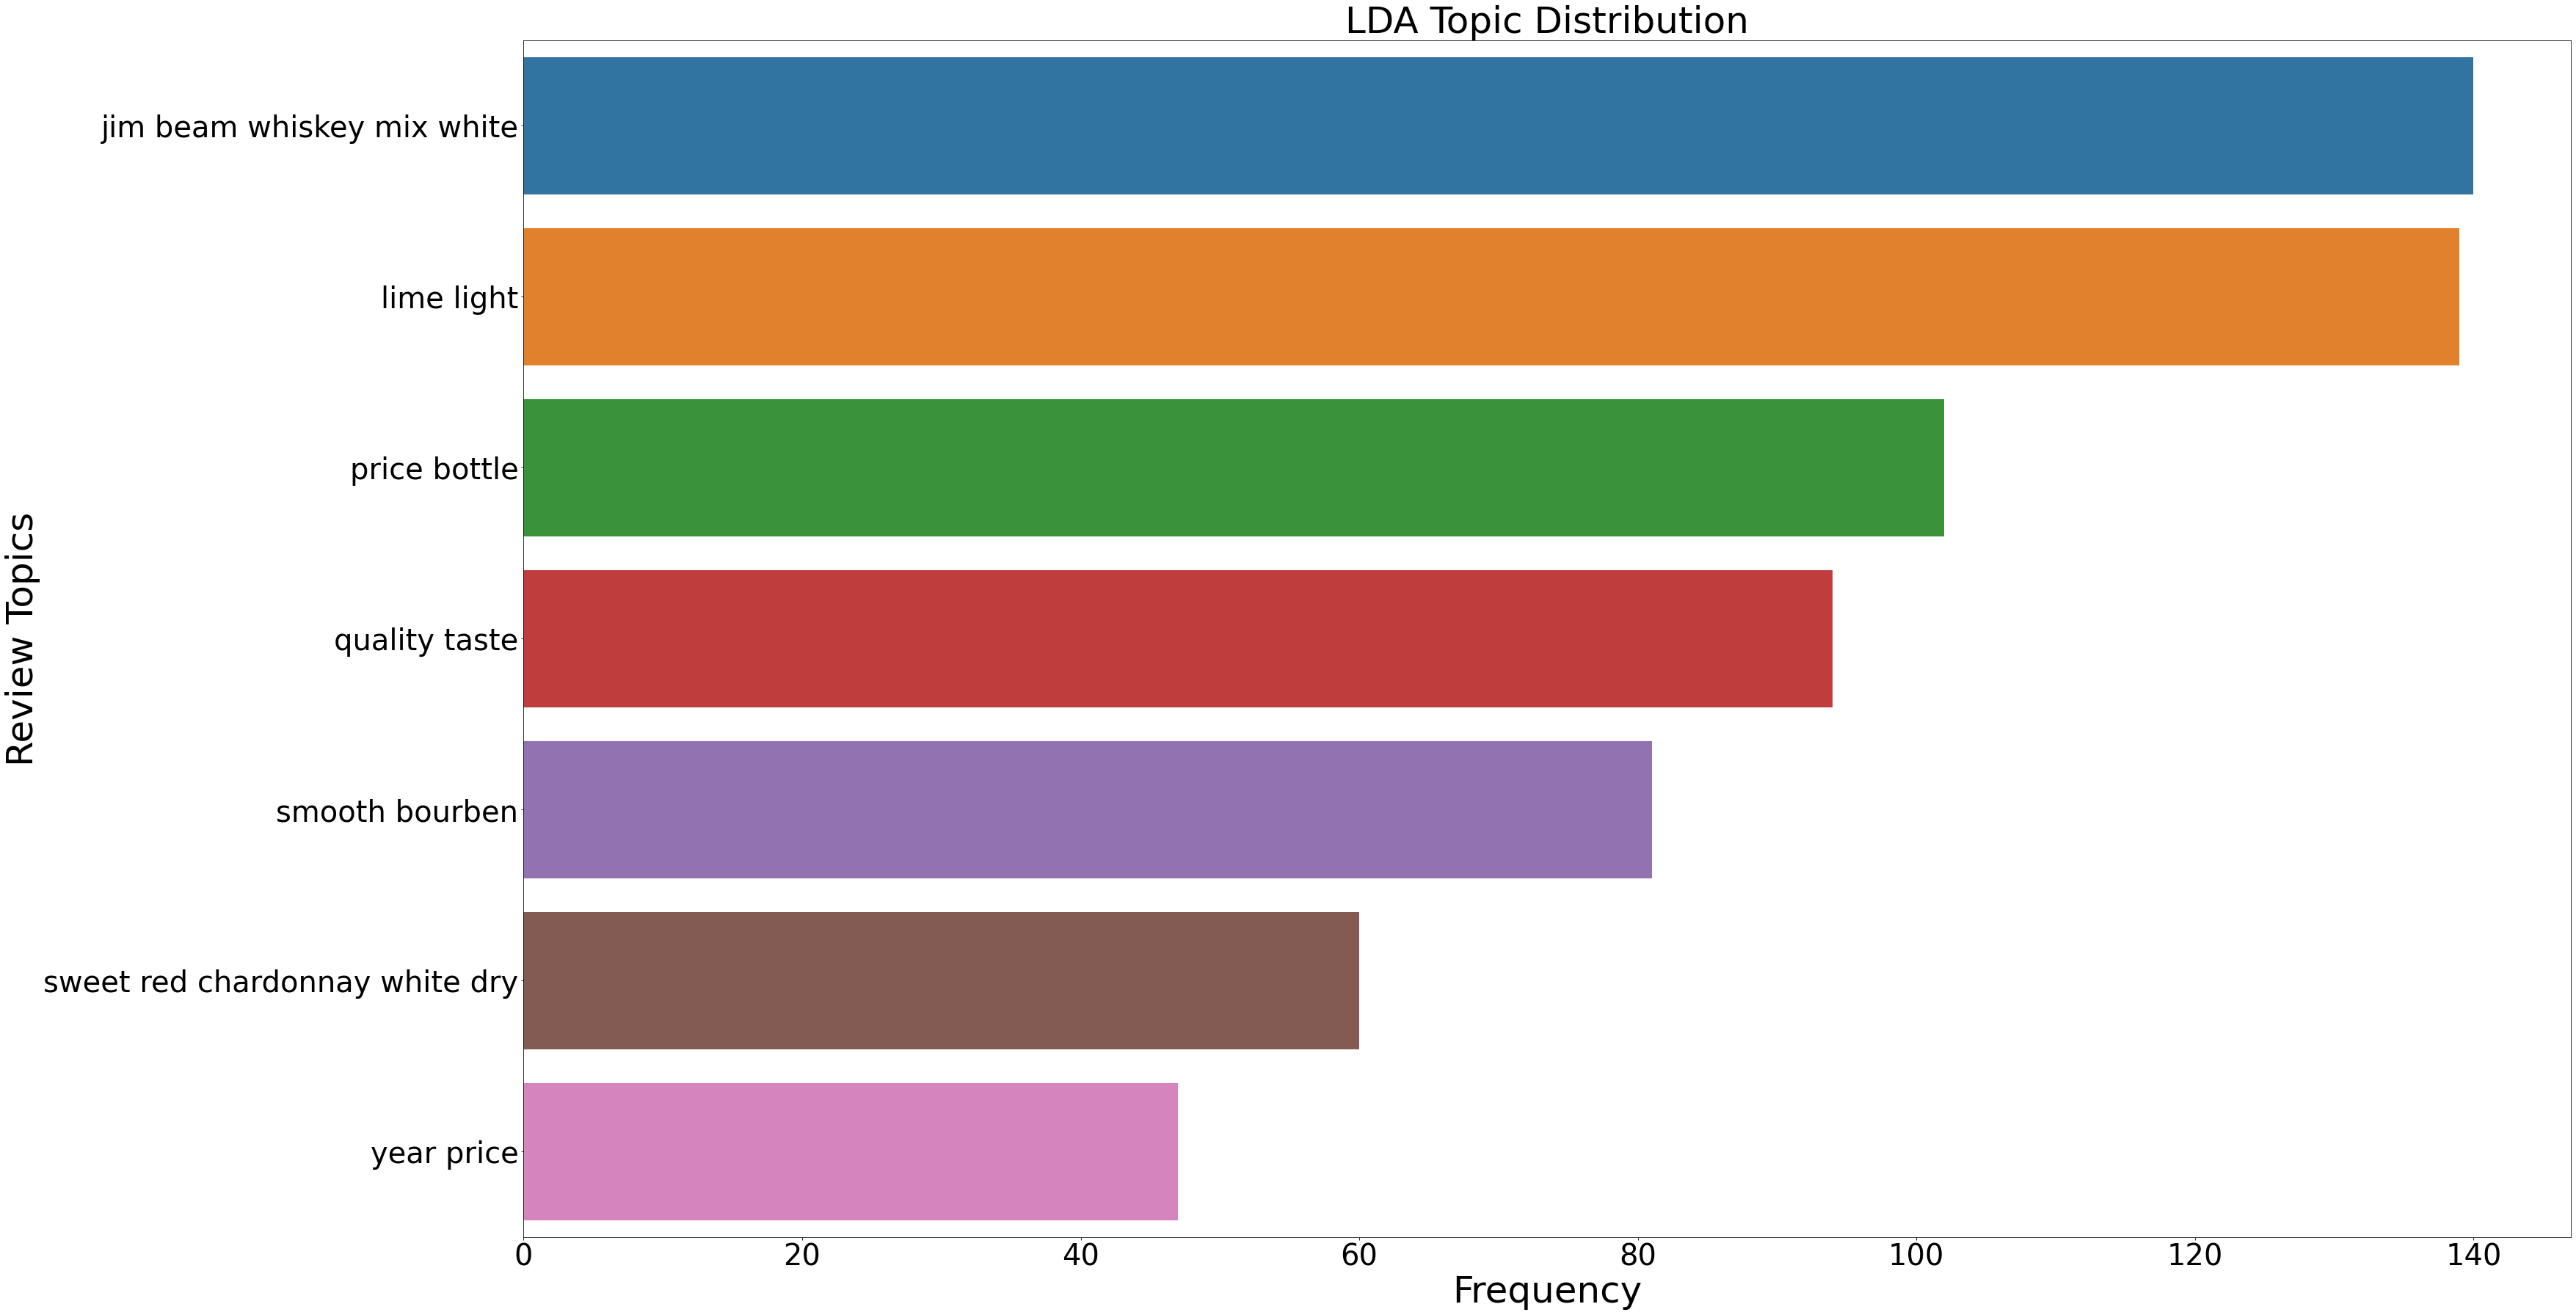

In [85]:
lda_x = df['lda_topics'].value_counts()
lda_y = lda_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_x, lda_y.index)
plt.title("LDA Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

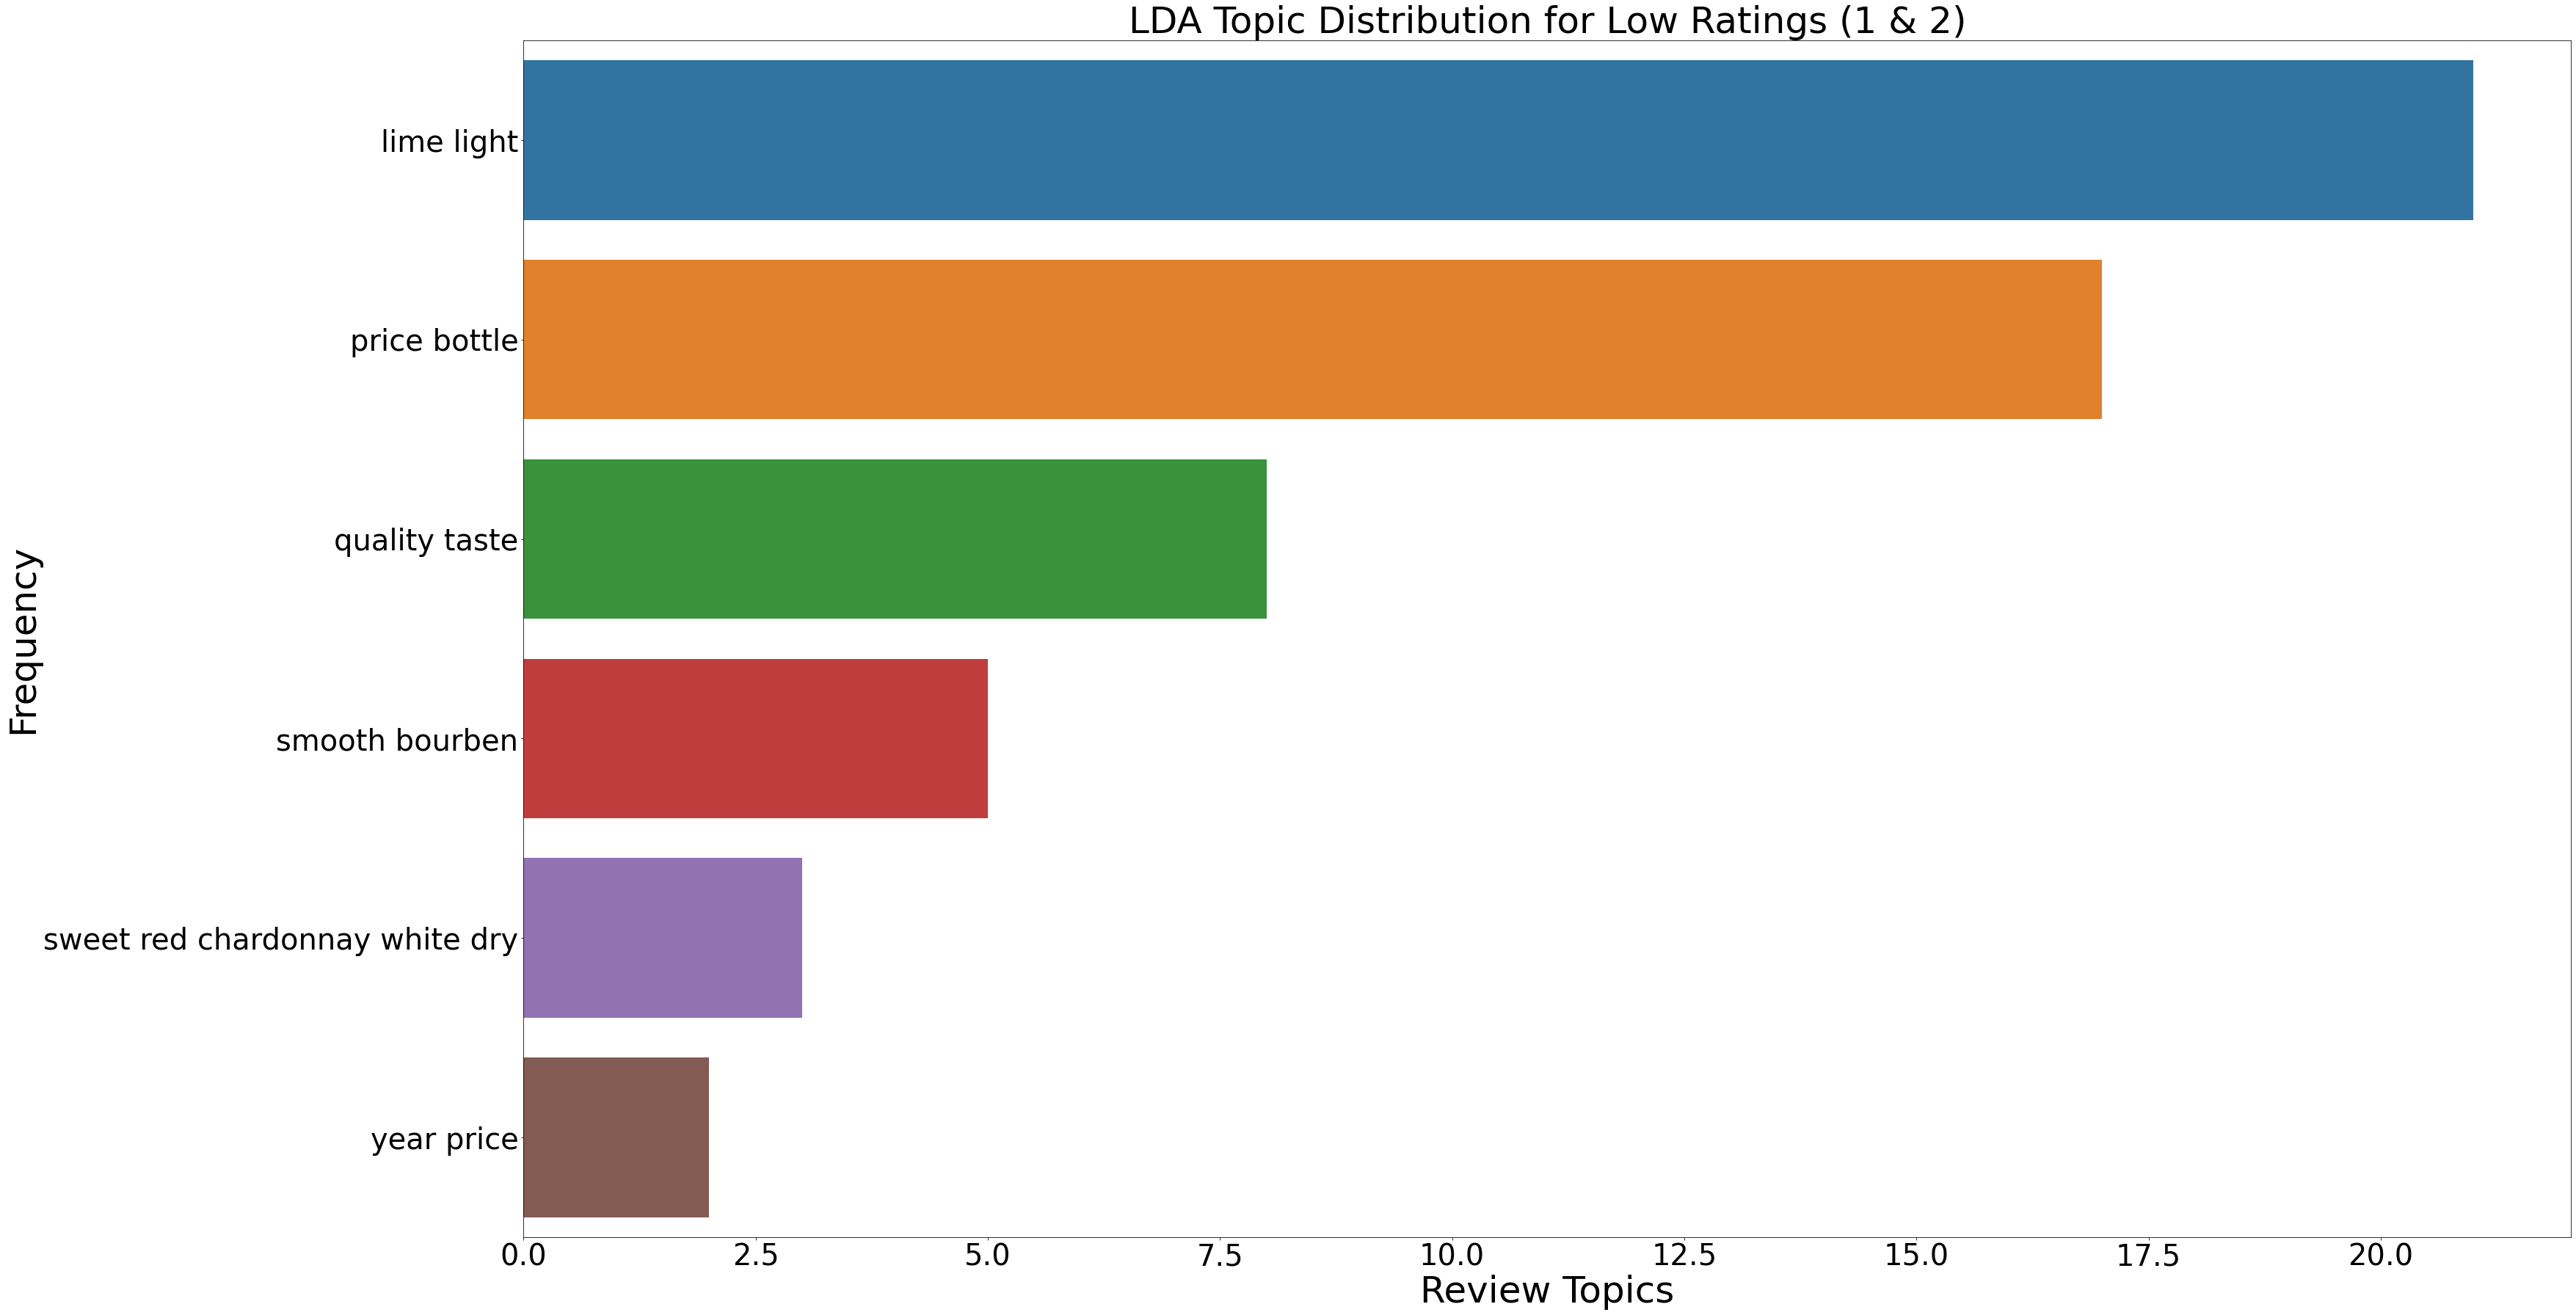

In [86]:
df_low_ratings = df.loc[(df['reviews_rating']==1) | (df['reviews_rating']==2)]
lda_low_x = df_low_ratings['lda_topics'].value_counts()
lda_low_y = lda_low_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_low_x, lda_low_y.index)
plt.title("LDA Topic Distribution for Low Ratings (1 & 2)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

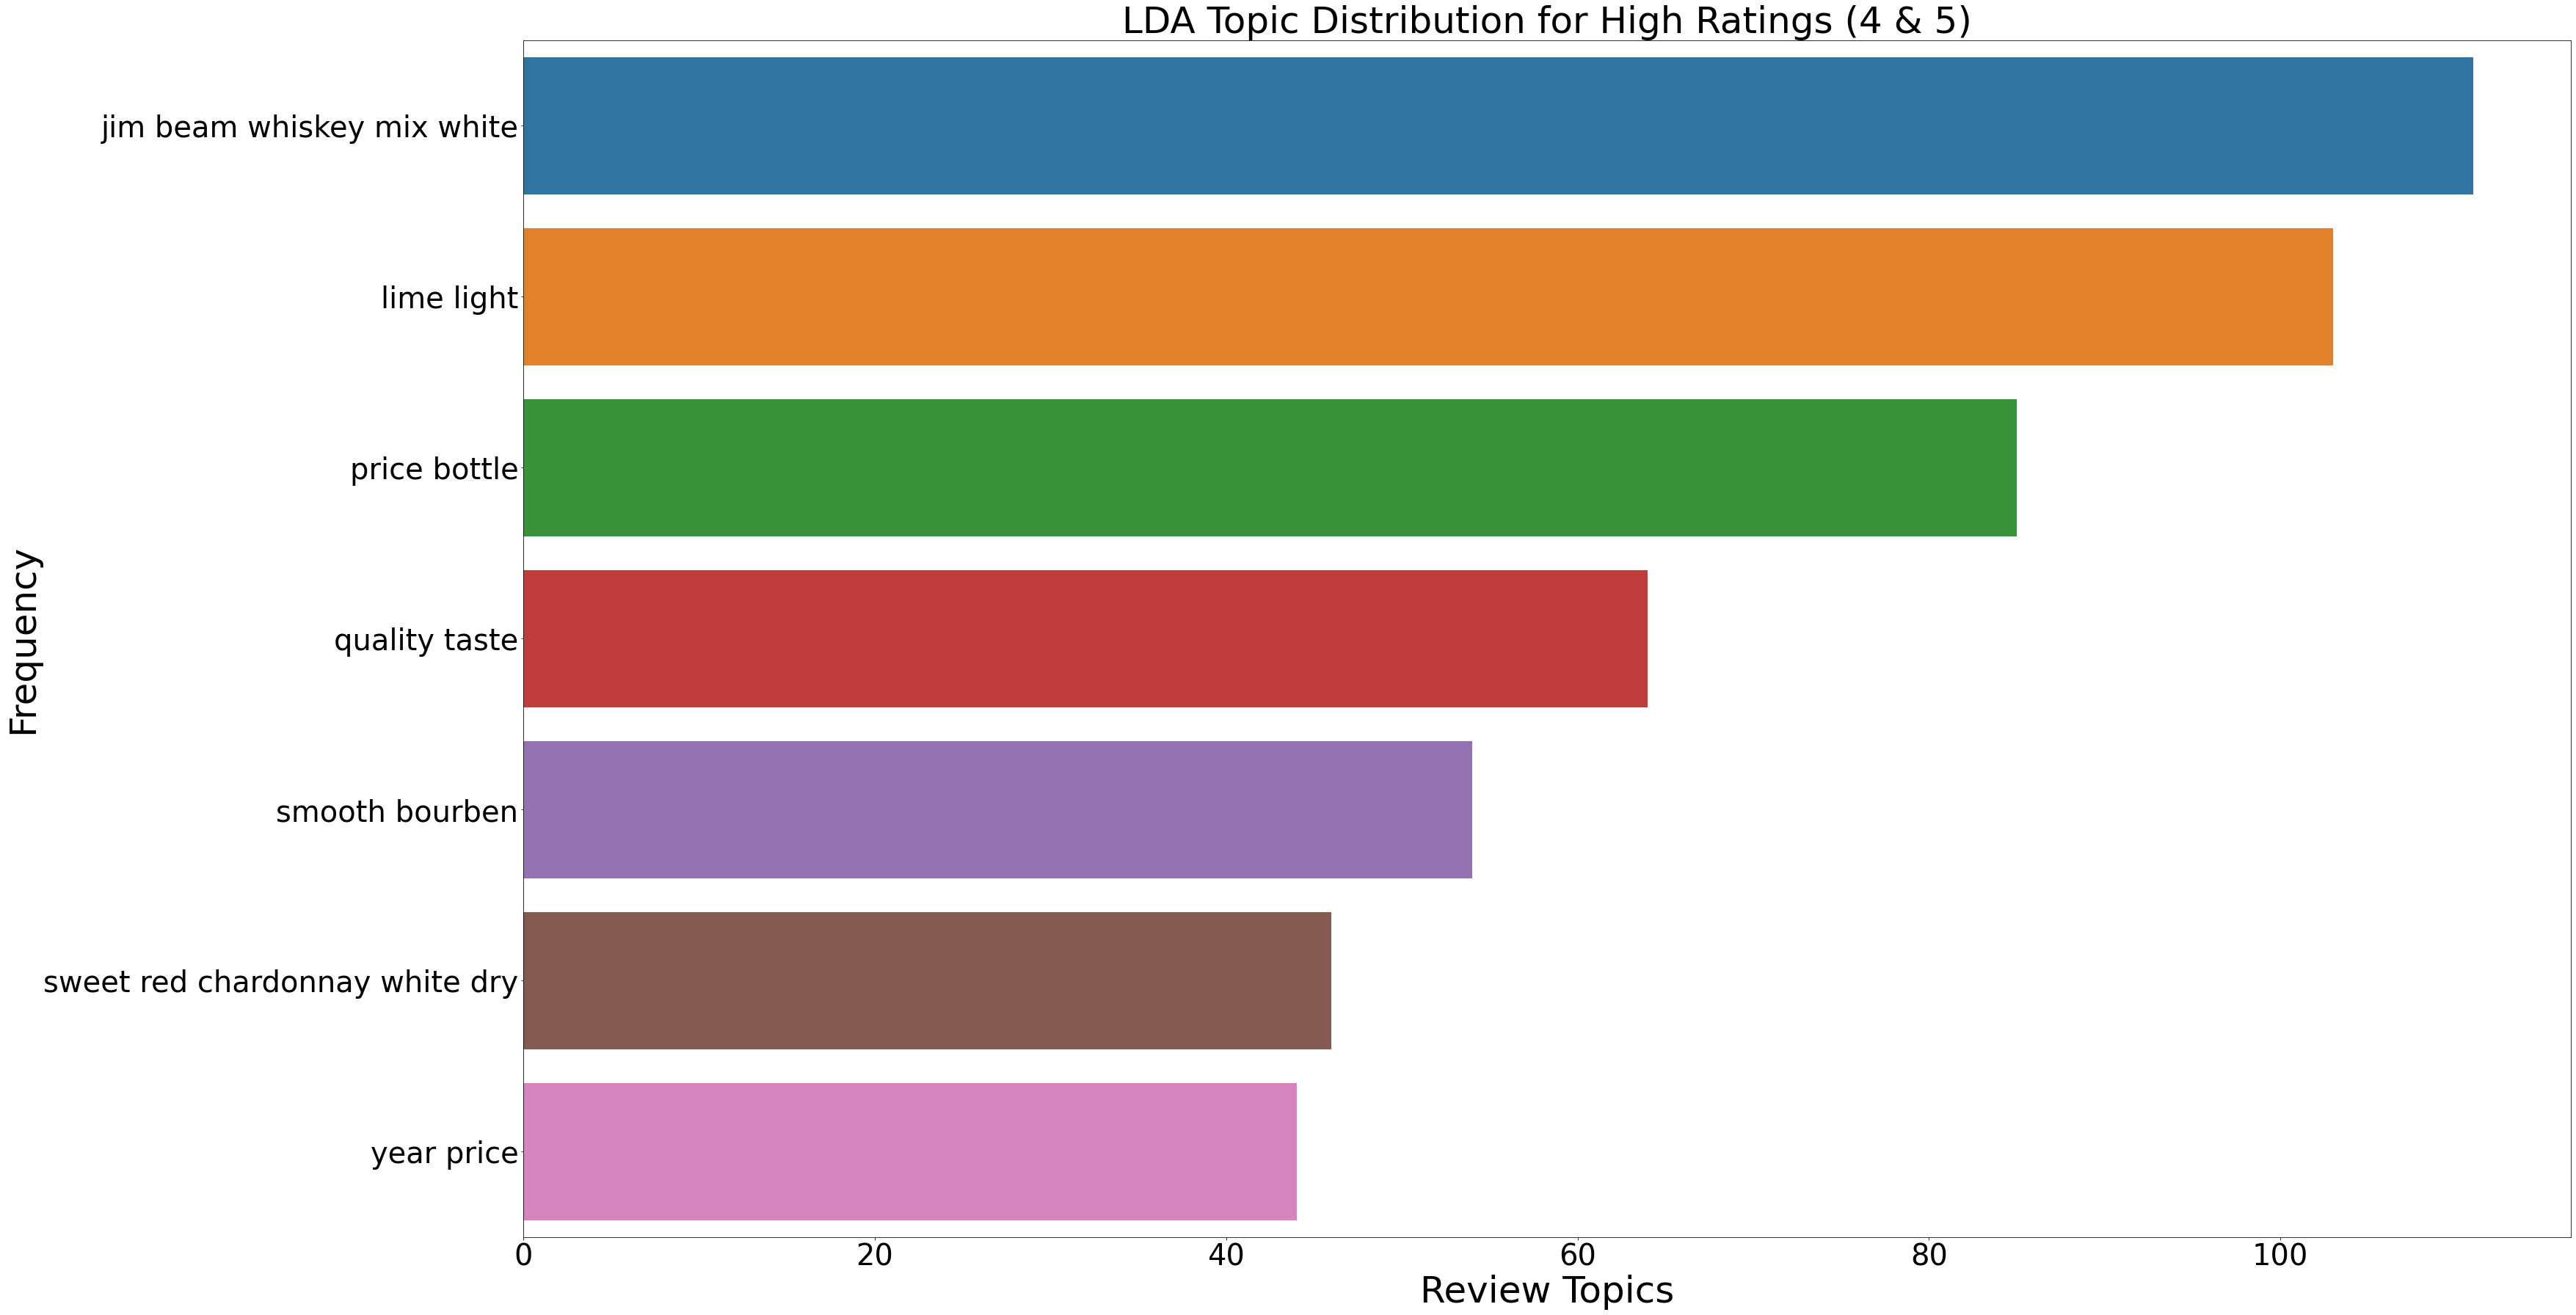

In [87]:
df_high_ratings = df.loc[(df['reviews_rating']==4) | (df['reviews_rating']==5)]
lda_high_x = df_high_ratings['lda_topics'].value_counts()
lda_high_y = lda_high_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_high_x, lda_high_y.index)
plt.title("LDA Topic Distribution for High Ratings (4 & 5)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

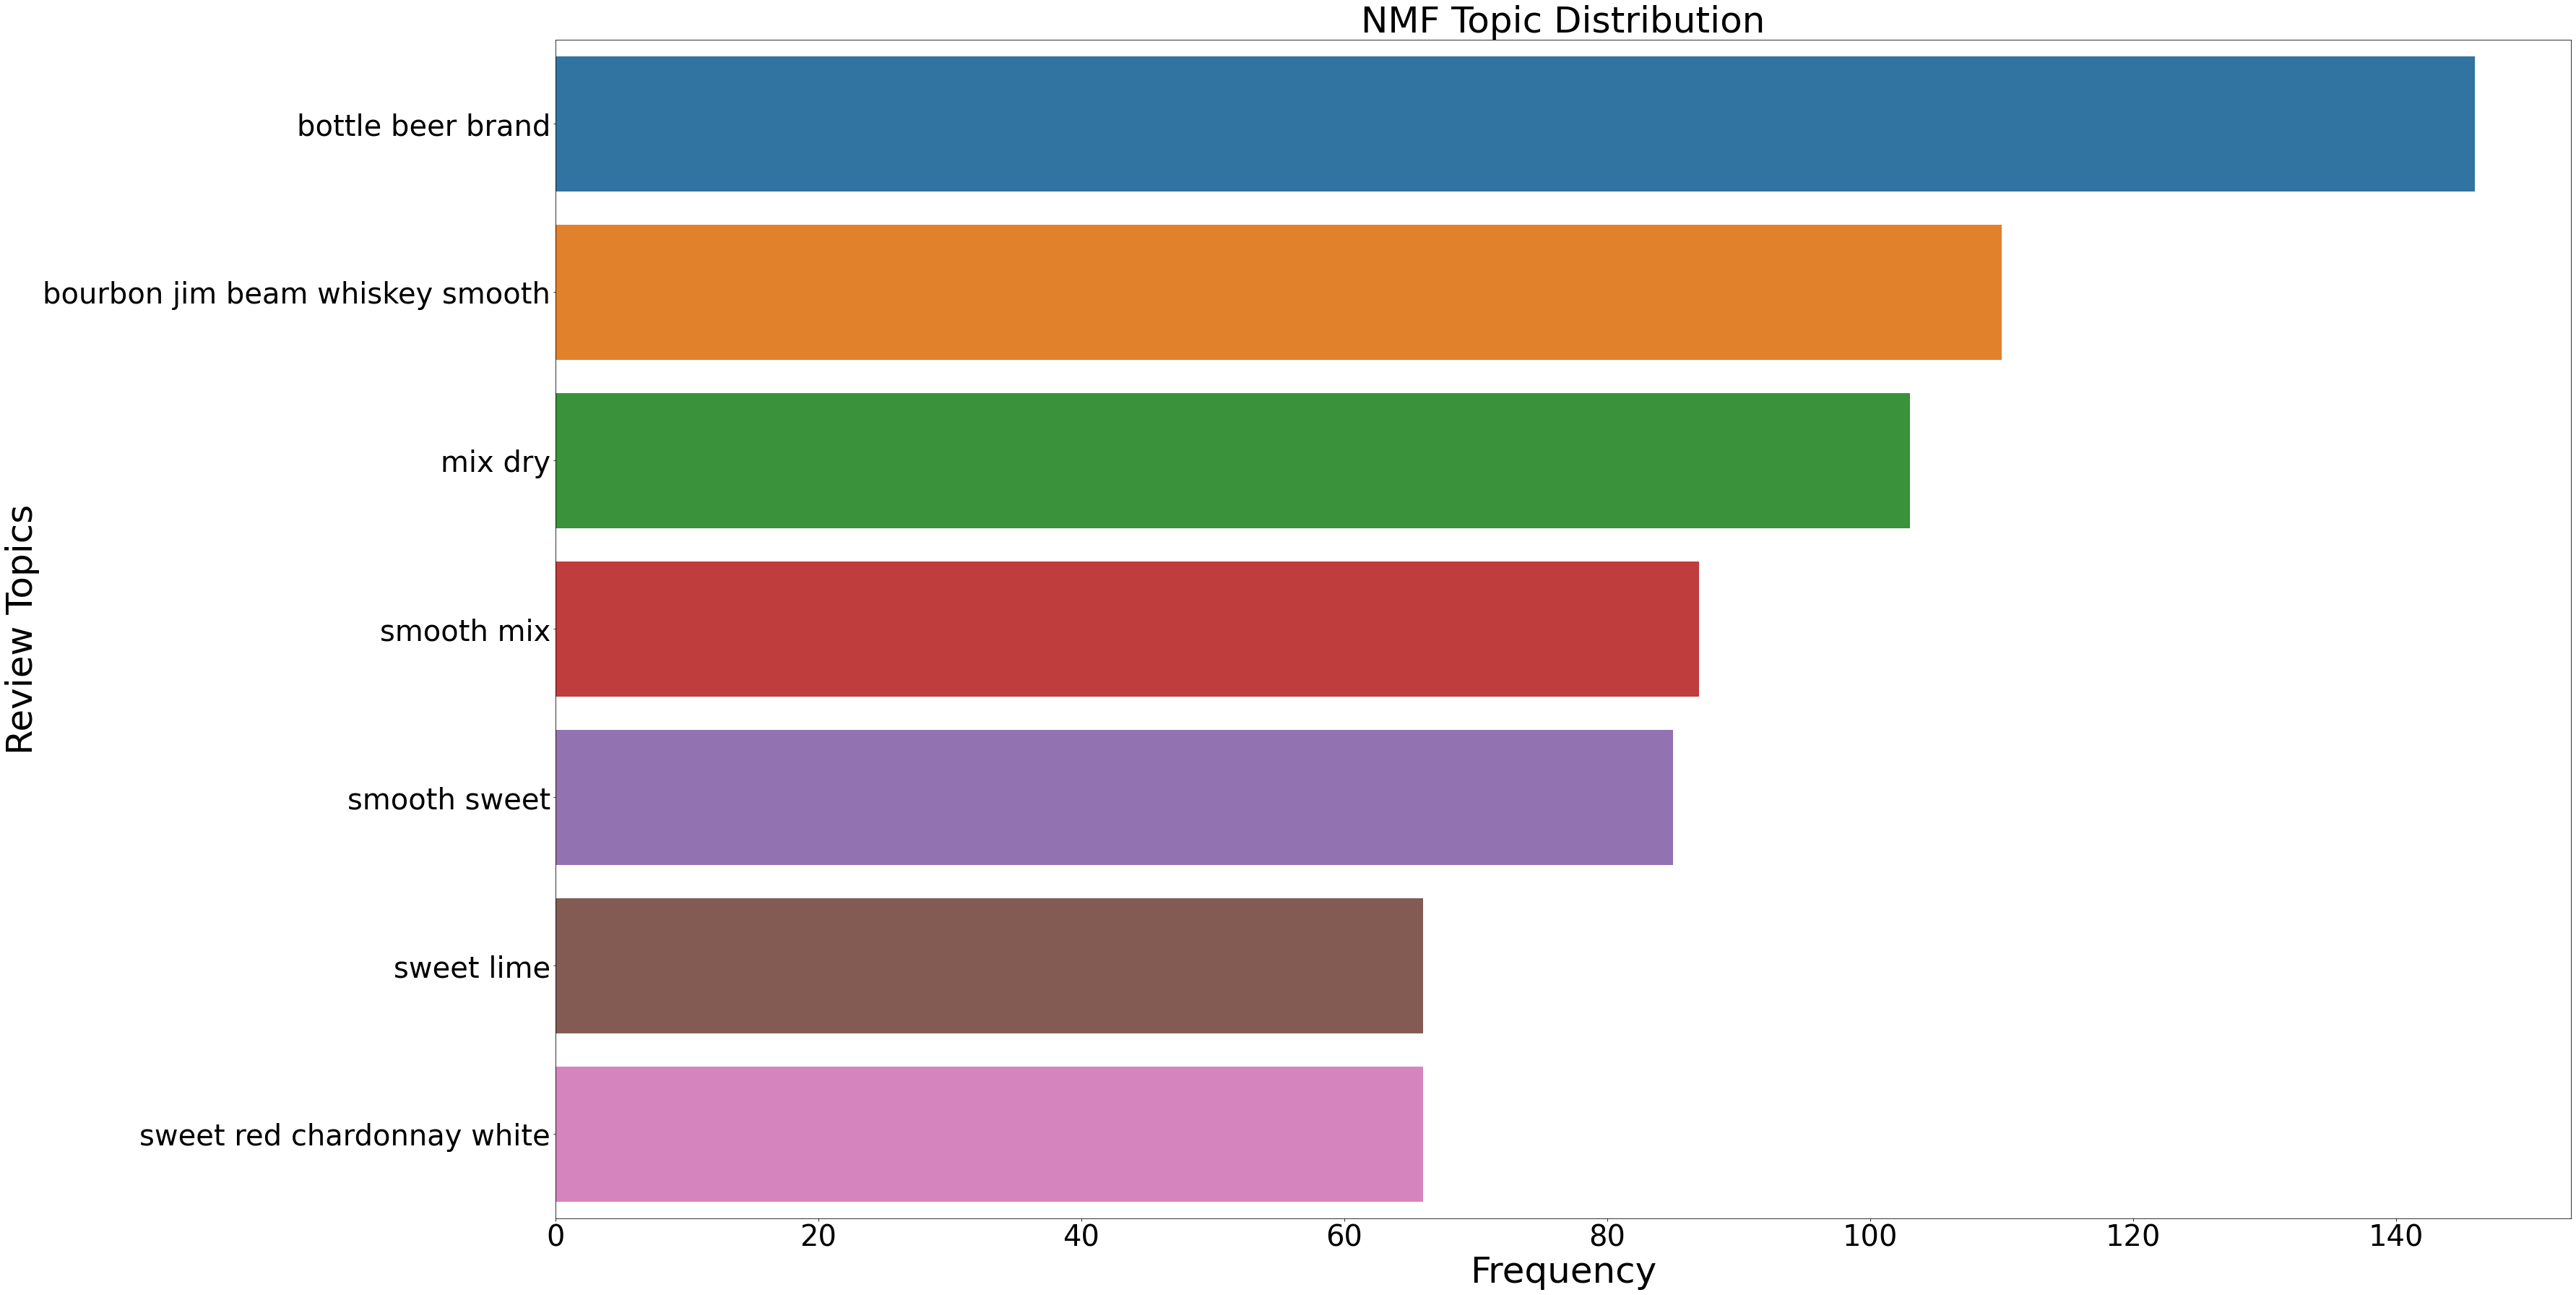

In [88]:
nmf_x = df['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

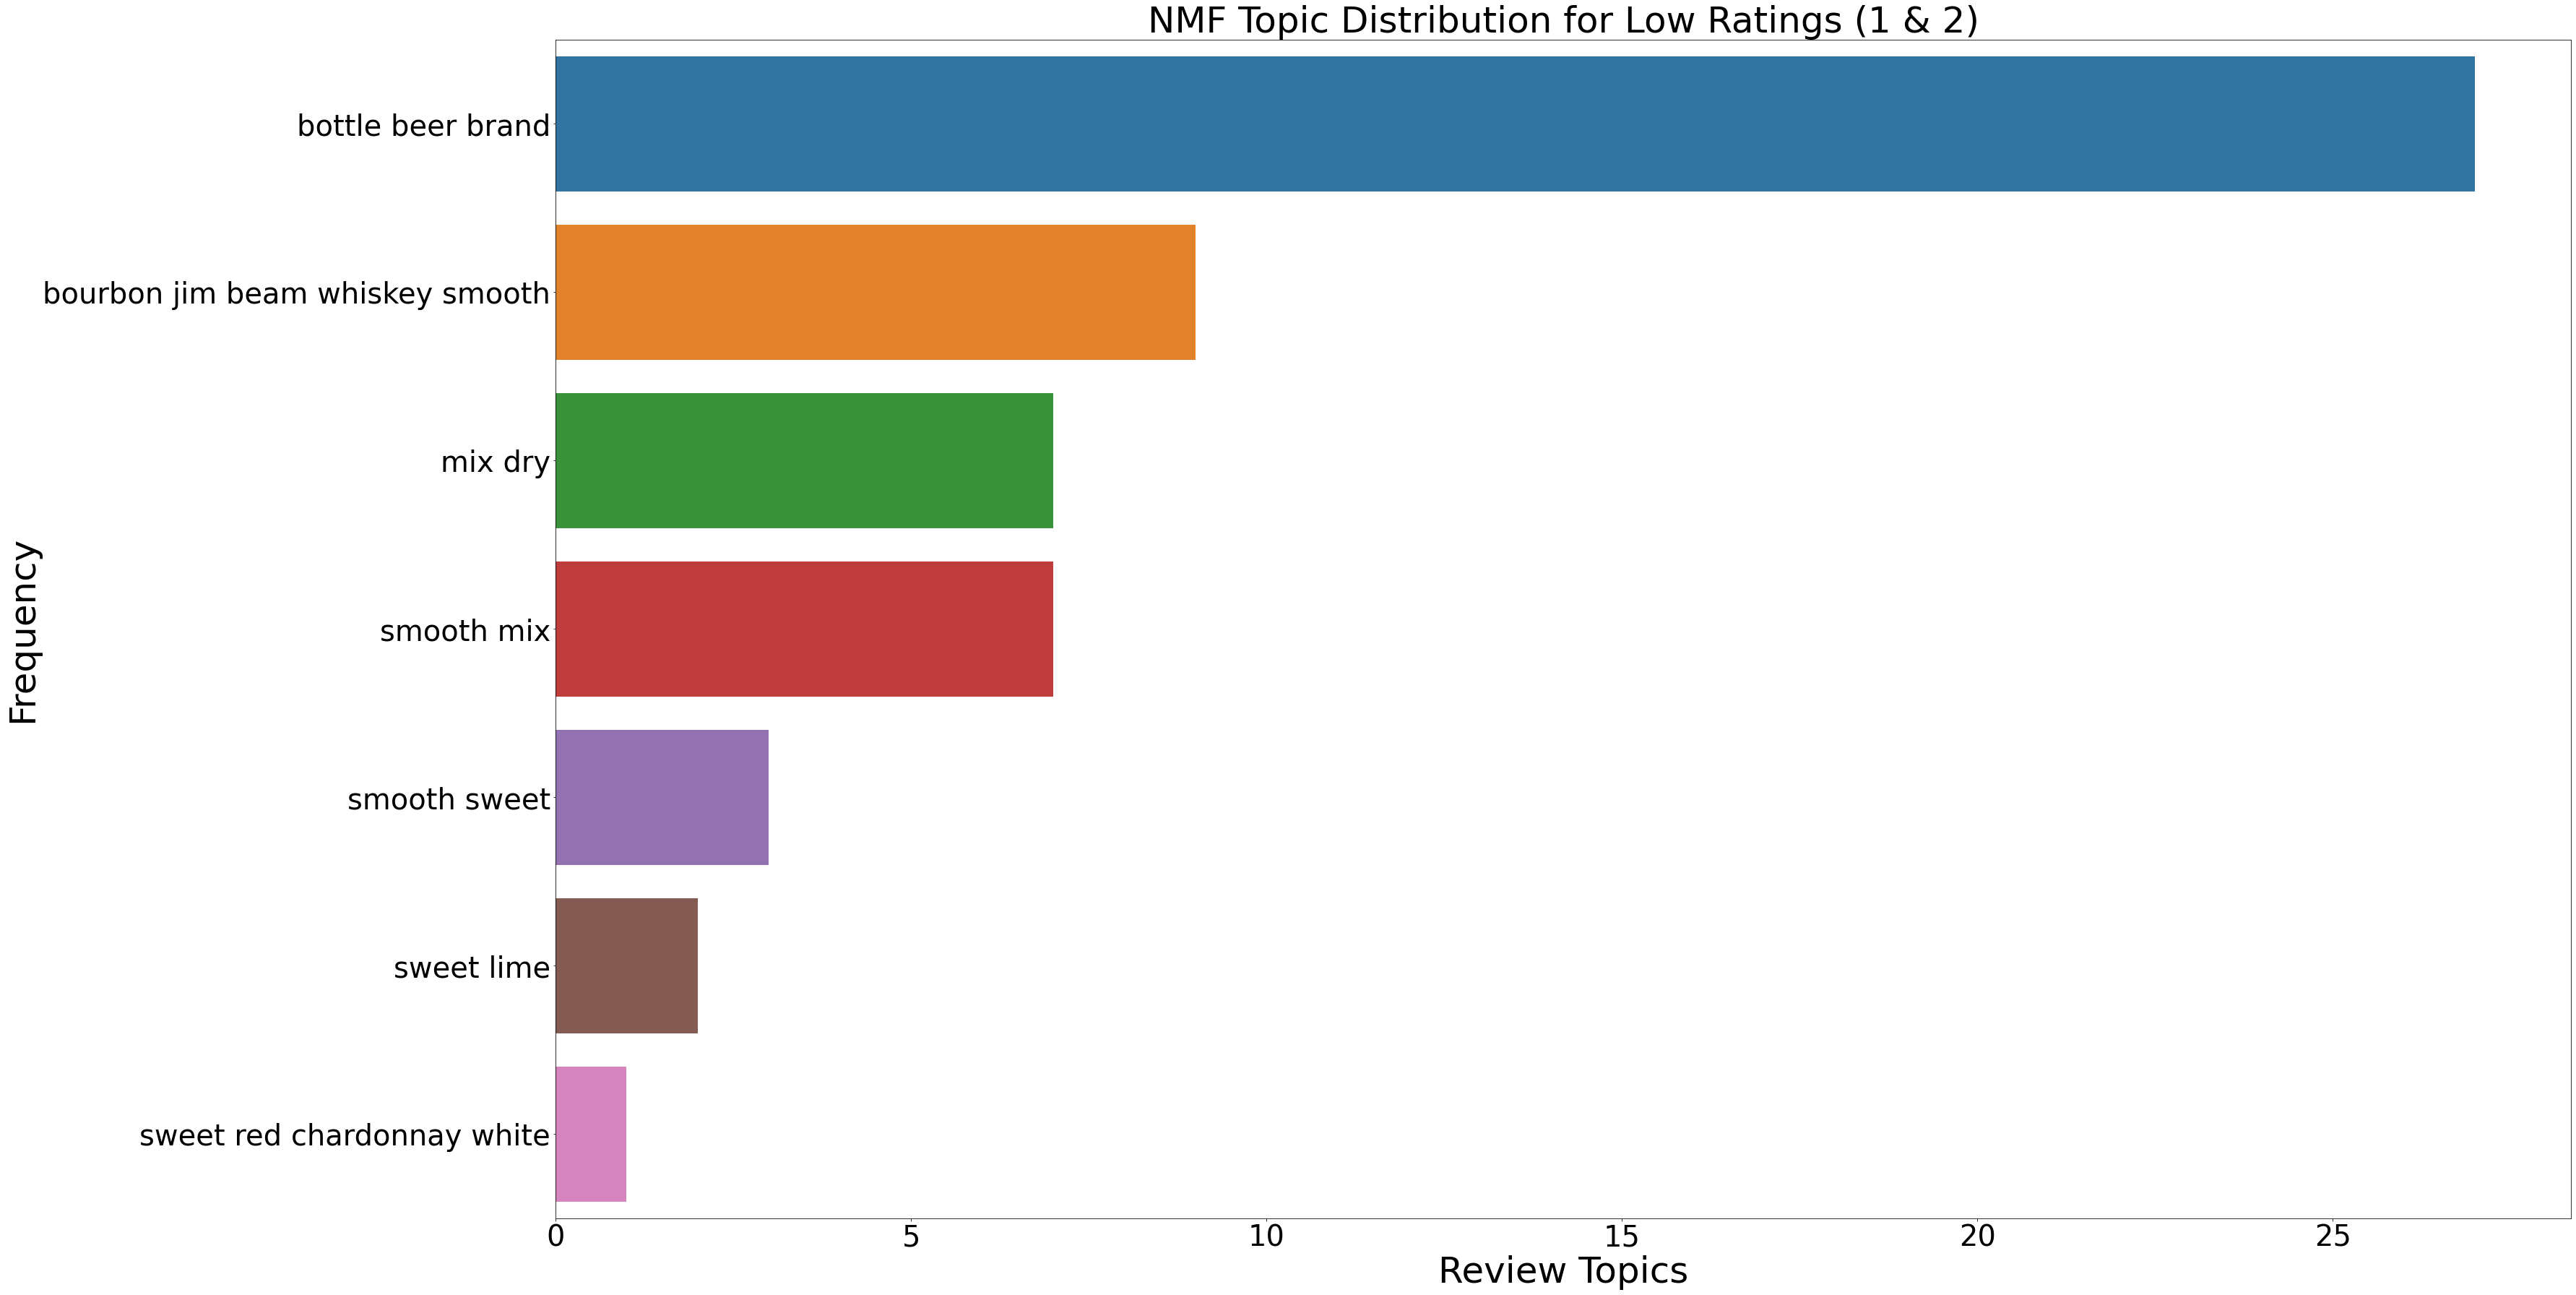

In [89]:
df_low_ratings = df.loc[(df['reviews_rating']==1) | (df['reviews_rating']==2)]
nmf_low_x = df_low_ratings['nmf_topics'].value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_low_x, nmf_low_y.index)
plt.title("NMF Topic Distribution for Low Ratings (1 & 2)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

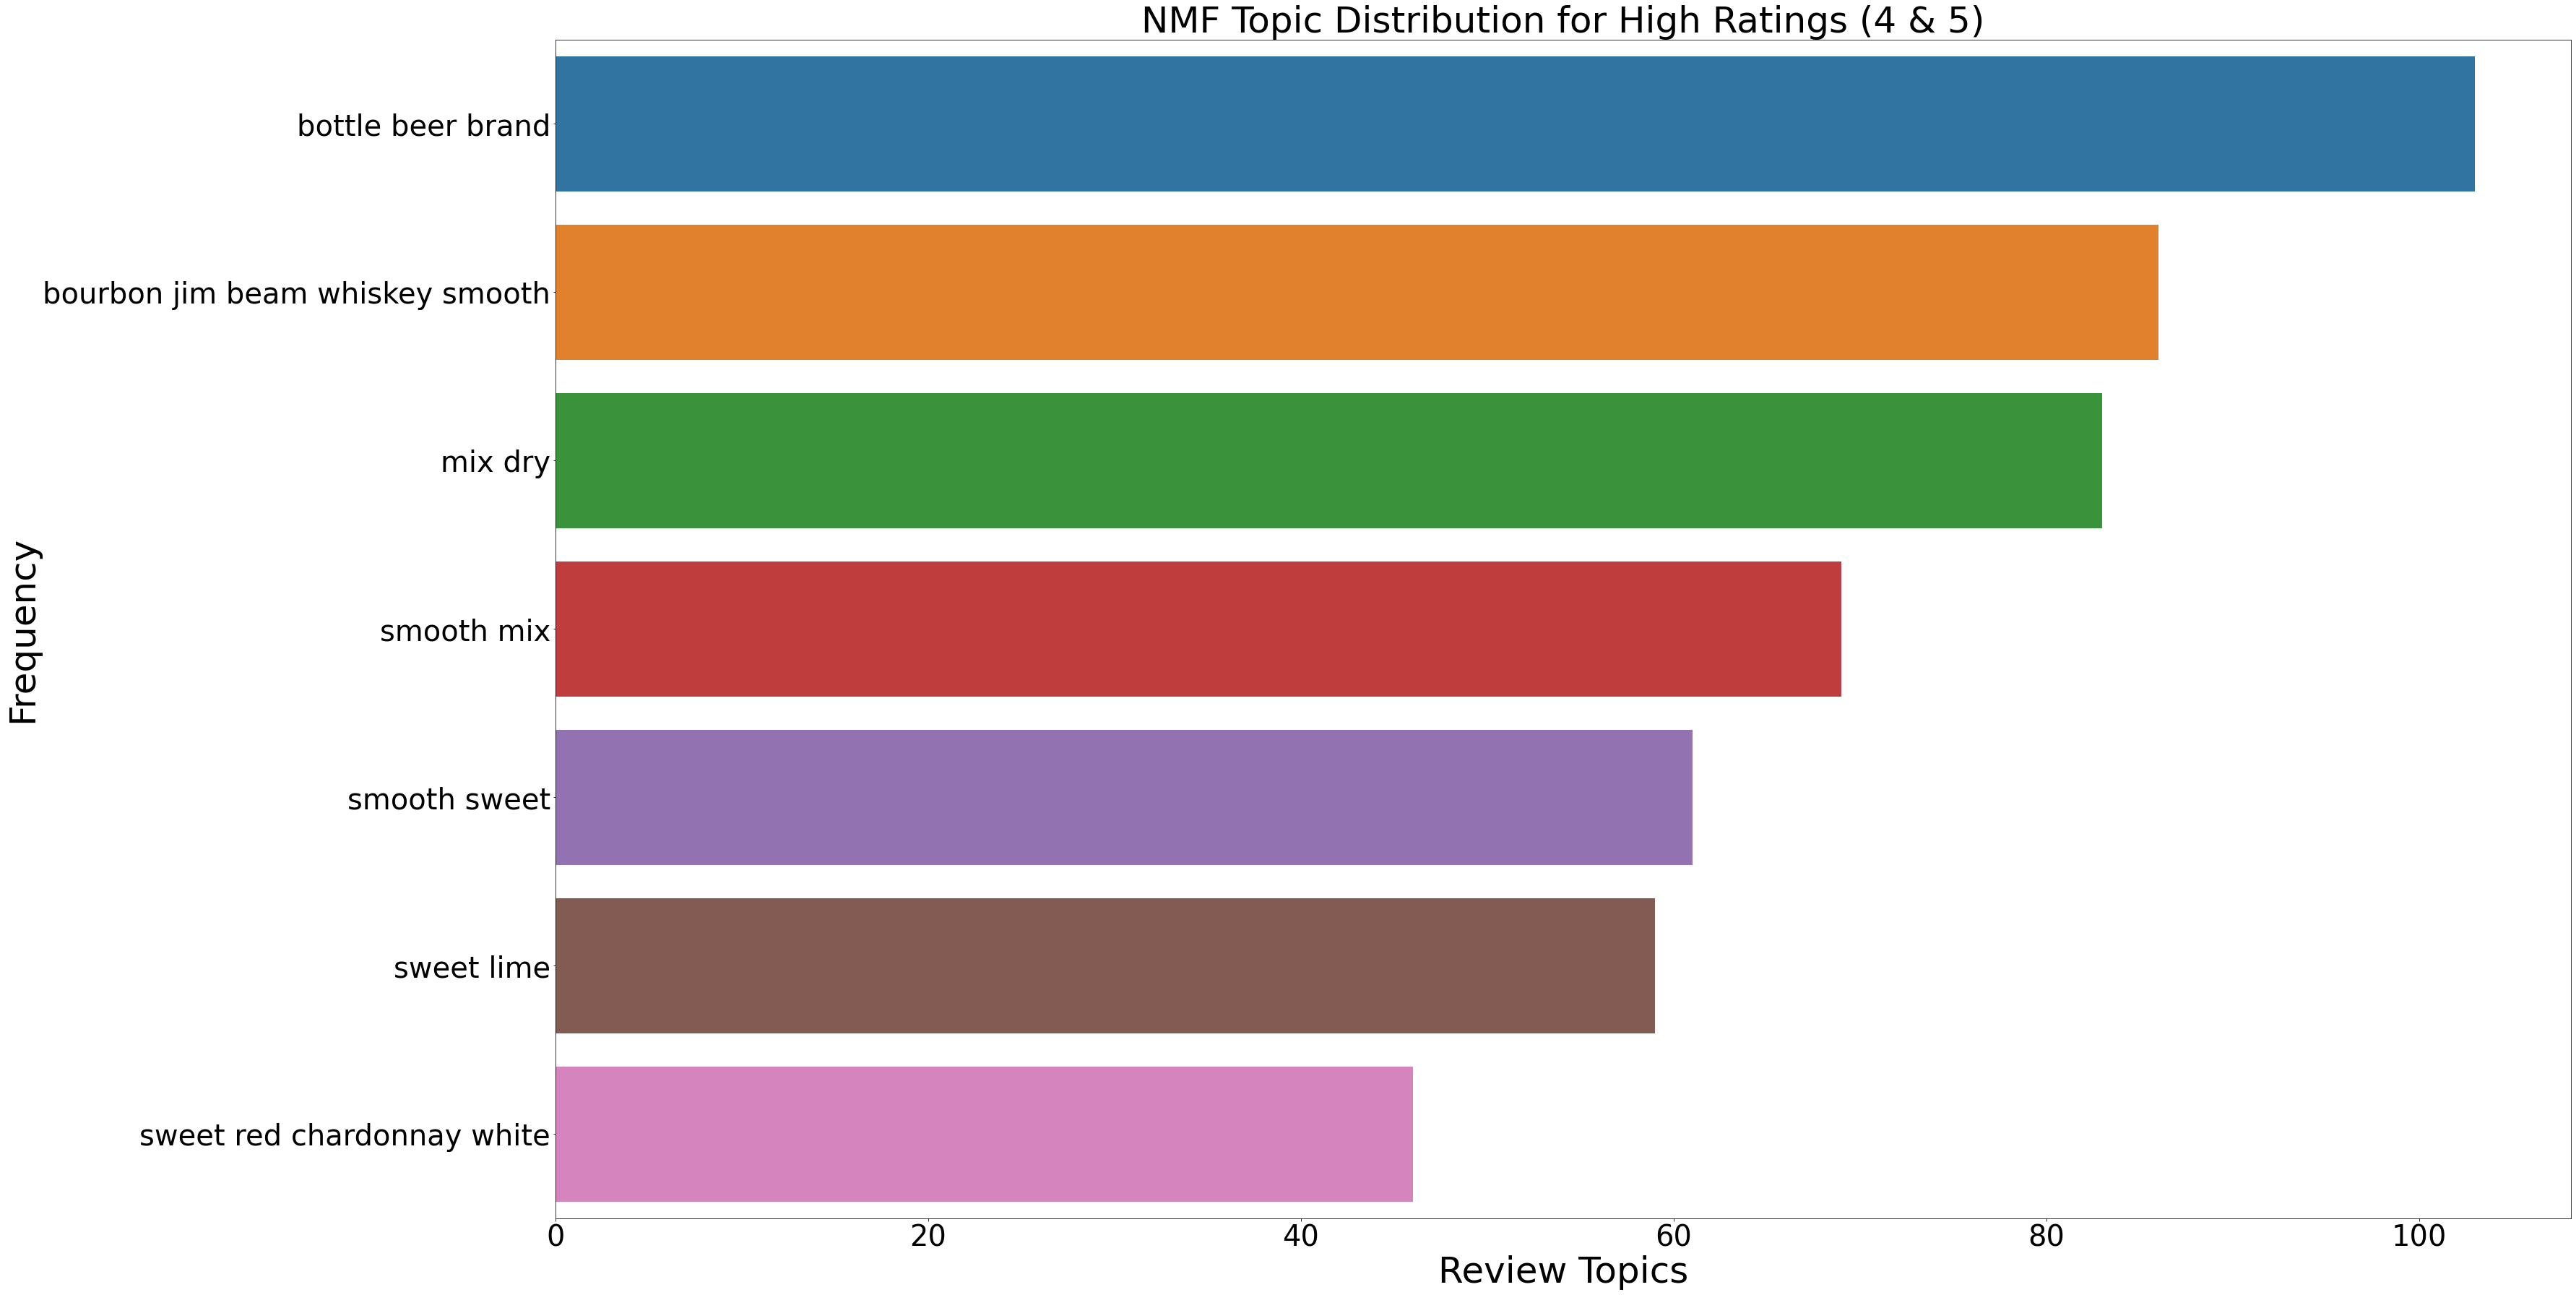

In [90]:
df_high_ratings = df.loc[(df['reviews_rating']==4) | (df['reviews_rating']==5)]
nmf_high_x = df_high_ratings['nmf_topics'].value_counts()
nmf_high_y = nmf_high_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_high_x, nmf_high_y.index)
plt.title("NMF Topic Distribution for High Ratings (4 & 5)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

In [ ]:
dataset